# Analysis of Baseball performance (1986-1987)

Datasets: Baseball Data [Link](https://lib.stat.cmu.edu/datasets/baseball.data)
The data consist of three files consisting of data on
the regular and leading substitute hitters in 1986, the regular pitchers in 1986 and the team statistics. The salary
data were taken from Sports Illustrated, April 20, 1987.
The 1986 and career statistics were taken
from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.
<br/>
<br/>
Aim:
- a) Can we predict the salaries of players from their performance metrics ?
We analyze the data using multi regression model to identify which performance metrics like batting average, runs, etc. explain the salaries of players. The model can help any players determine if they are fairly compensated and evaluate their performance credibility.
- b) What impact does external factors (team, league, season) have on player performance ?
We identify what external features could be a contributor to player performance metric by observing patterns of top players. This gives insights of factors to further identify if team coaching for a particular team or resourceful team have better players.

In [1]:
%pip install pandas
%pip install matplotlib
%pip install statsmodels
%pip install seaborn
%pip install scikit-learn
%pip install missingno

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np  # Importing NumPy for numerical operations
import pandas as pd  # Importing Pandas for data manipulation and analysis
import seaborn as sns  # Importing Seaborn for statistical data visualization
import matplotlib.pylab as plt  # Importing Matplotlib for plotting and visualization
import statsmodels.api as sm  # Importing statsmodels for statistical models like OLS regression
import missingno as msno  # Importing missingno for visualizing missing data patterns
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting data into training and test sets
from sklearn.metrics import mean_squared_error  # Importing mean_squared_error for evaluating regression model performance

We use the above packages to perform the analysis:
- Pandas for loading the datasets 
- Matplotlib for visualizations
- Statsmodels & scikit-learn to load linear regression model and perform statistics
- missingno to visualize null missing values

After importing we load the pitchers and hitters dataset using pandas


In [11]:
hitters = pd.read_csv("datasets/hitter.csv")
pitchers = pd.read_csv("datasets/pitcher.csv")

### Data Preprocessing
In this section we do the following
- We examine if the dataset has any null values by using `misssingno` library and panda's df.null().
- Clean by handling the null values
- Map any abbrevations identify relevant columns for analysis

For all the above steps we do it first for the hitters data and then move to pitchers data


Hitter                      0
NumberAtBat1986             0
NumberHits1986              0
NumberHomeRuns1986          0
NumberRuns1986              0
NumberRunsBat1986           0
NumberWalks1986             0
YearsMajorleag              0
NumberBatCareer             0
NumberHitsCareer            0
NumberHomeRunsCareer        0
NumberRunsCareer            0
NumberRunsBatCareer         0
NumberWalksCareer           0
LeagueEnd1986               0
DivisionEnd1986             0
TeamEnd1986                 0
Position1986                0
PutOuts1986                 0
Assists1986                 0
Errors1986                  0
AnnualSalaryOpenDay1987    59
League1987                  0
Team1987                    0
dtype: int64


<Axes: >

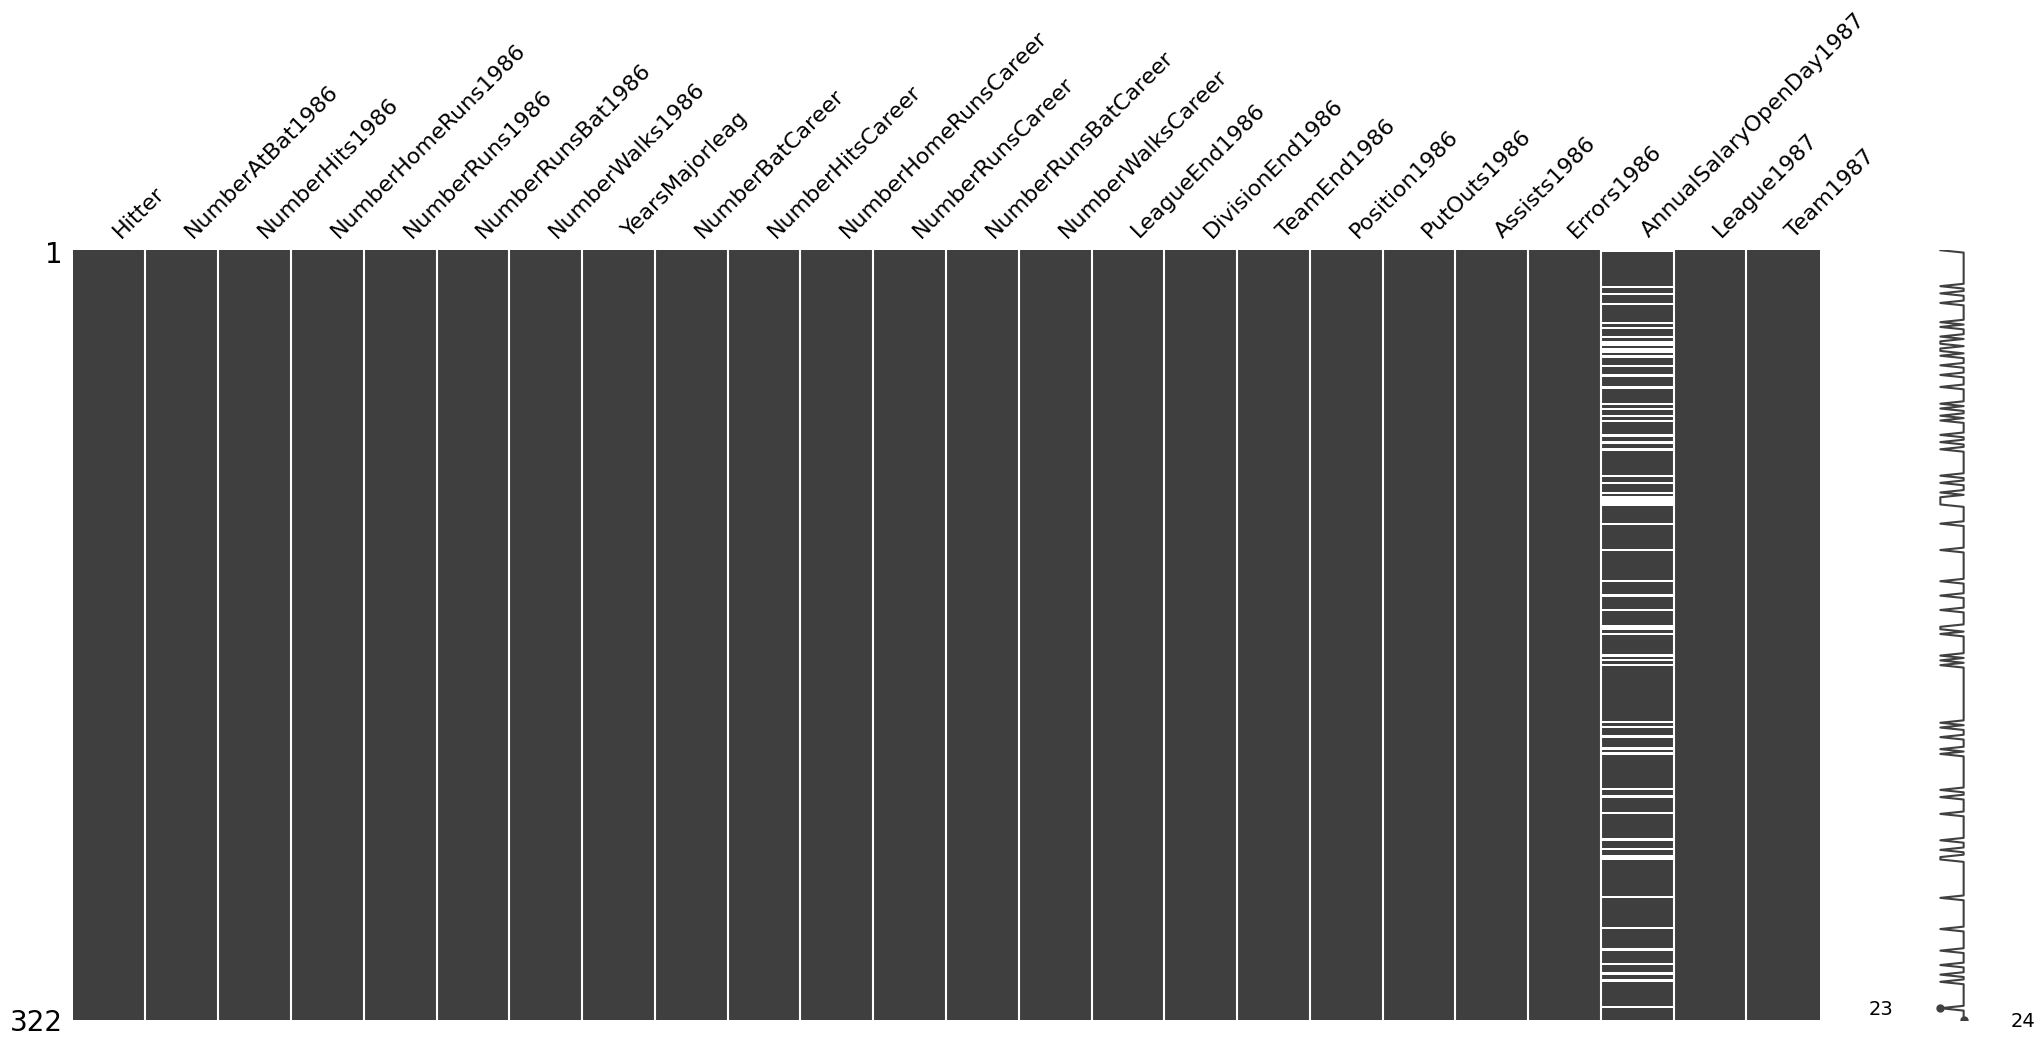

In [12]:

print(hitters.isnull().sum())

msno.matrix(hitters)

We see that there are 59 null values in the salary column, since salary column is our target column we avoid making any replacements misinterpreting the values. So we safely drop them.

In [13]:
hitters = hitters.dropna()
hitters.isnull().sum()
hitters.shape

(263, 24)

Next, we see in our dataset there are many abbrevations for the team name and league name so we first create a dictionary of mapping for these abbrevations and continue to label them as new columns in our dataframe.

In [ ]:
# Transform the columns with categroical data like teamnames, leaugues and division indexes we know
TEAM_NAME_MAPPINGS = {
  "N.Y.":"New York",
"Phi.":"Philadelphia",
"St.L.":"St. Louis",
"Mon.":"Montreal",
"Chi.":"Chicago",
"Pit.":"Pittsburgh",
"Hou.":"Houston",
"Cin.":"Cincinnati",
"S.F.":"San Francisco",
"S.D.":"San Diego",
"L.A.":"Los Angeles",
"Atl.":"Atlanta",
"Bos.":"Boston",
"Det.":"Detroit",
"Tor.":"Toronto",
"Cle.":"Cleveland",
"Mil.":"Milwaukee",
"Bal.":"Baltimore",
"Cal.":"California",
"Tex.":"Texas",
"K.C.":"Kansas City",
"Oak.":"Oakland",
"Min.":"Minnesota",
"Sea.":"Seattle",
}
TEAM_NAME_INDEXES = (
  "N.Y.",
"Phi.",
"St.L.",
"Mon.",
"Chi.",
"Pit.",
"Hou.",
"Cin.",
"S.F.",
"S.D.",
"L.A.",
"Atl.",
"Bos.",
"Det.",
"Tor.",
"Cle.",
"Mil.",
"Bal.",
"Cal.",
"Tex.",
"K.C.",
"Oak.",
"Min.",
"Sea.",
)
LEAGUE_MAPPINGS = {"N":"National","A":"American"}
LEAGUE_INDEXES = ("N", "A")
DIVISION_MAPPINGS = {"W":"WEST","E":"EAST"}
DIVISION_INDEXES = ("W", "E")
PLAYER_POSITION_MAPPINGS = {
  "1B":   "First Base",
     "2B":   "Second Base",
     "SS":   "Short Stop",
     "3B":   "Third Base",
     "RF":  "Right Field",
     "CF":   "Center Field",
     "LF":   "Left Field",
     "C":    "Catcher",
     "DH":   "Designated Hitter",
     "OF":   "Outfield",
     "UT":   "Utility",
     "OS":   "Outfield and Short Stop",
     "3S":   "Third Base and Short Stop",
     "13":   "First and Third Base",
     "3O":   "Third Base and Outfield",
     "O1":   "Outfield and First Base",
     "S3":   "Short Stop and Third Base",
     "32":   "Third and Second Base",
     "DO":   "Designated Hitter and Outfield",
     "OD":   "Outfield and Designated Hitter",
     "CD":   "Catcher and Designated Hitter",
     "CS":   "Catcher and Short Stop",
     "23":   "Second and Third Base",
     "1O":   "First Base and Outfield",
     "2S":  "Second Base and Short Stop",
}
PLAYER_POSITION_INDEXES = tuple(PLAYER_POSITION_MAPPINGS.keys())


# Transform the columns with abbrevations for a proper mappings and clear labelings later
def transform_labels(map):
  def mapper(val):
    return map[val]
  return mapper
hitters["LeagueEnd1986Vals"] = hitters["LeagueEnd1986"].transform(transform_labels(LEAGUE_MAPPINGS))
hitters["DivisionEnd1986Vals"] = hitters["DivisionEnd1986"].transform(transform_labels(DIVISION_MAPPINGS))
hitters["TeamEnd1986Vals"] = hitters["TeamEnd1986"].transform(transform_labels(TEAM_NAME_MAPPINGS))
hitters["Position1986Vals"] = hitters["Position1986"].transform(transform_labels(PLAYER_POSITION_MAPPINGS))
hitters["League1987Vals"] = hitters["League1987"].transform(transform_labels(LEAGUE_MAPPINGS))
hitters["Team1987Vals"] = hitters["Team1987"].transform(transform_labels(TEAM_NAME_MAPPINGS))
hitters.head()

Hitter  NumberAtBat1986  NumberHits1986  NumberHomeRuns1986  \
1        Alan Ashby              315              81                   7   
2       Alvin Davis              479             130                  18   
3      Andre Dawson              496             141                  20   
4  Andres Galarraga              321              87                  10   
5   Alfredo Griffin              594             169                   4   

   NumberRuns1986  NumberRunsBat1986  NumberWalks1986  YearsMajorleag  \
1              24                 38               39              14   
2              66                 72               76               3   
3              65                 78               37              11   
4              39                 42               30               2   
5              74                 51               35              11   

   NumberBatCareer  NumberHitsCareer  ...  Errors1986  \
1             3449               835  ...          10   
2             1624               457  ...          14   
3             5628              1575  ...           3   
4              396               101  ...           4   
5             4408              1133  ...          25   

   AnnualSalaryOpenDay1987  League1987  Team1987 LeagueEnd1986Vals  \
1                    475.0           N      Hou.          National   
2                    480.0           A      Sea.          American   
3                    500.0           N      Chi.          National   
4                     91.5           N      Mon.          National   
5                    750.0           A      Oak.          American   

  DivisionEnd1986Vals TeamEnd1986Vals Position1986Vals  League1987Vals  \
1                WEST         Houston          Catcher        National   
2                WEST         Seattle       First Base        American   
3                EAST        Montreal      Right Field        National   
4                EAST        Montreal       First Base        National   
5                WEST         Oakland       Short Stop        American   

   Team1987Vals  
1       Houston  
2       Seattle  
3       Chicago  
4      Montreal  
5       Oakland  

[5 rows x 30 columns]

Now is the right time to define the identify and seperate the columns of interest.
- 1986 Performance columns - These are columns which are performance metric of player specific to 1986 season match, these do not include the columns like TeamEnd1986 as it is not performance related
- Career Performance columns - These are columns that are performance metric of the player quantifying metric throught the career
- Non performance columns - These are external factors column not related directly to performance which are team, league and division of the player which are not relevant to the regression but required later for deteriminig impact of these on player.

In [20]:
performance_columns_1986 = [
    "NumberAtBat1986",'NumberHits1986', 'NumberHomeRuns1986', 'NumberRuns1986', 'NumberRunsBat1986', 'NumberWalks1986', 'PutOuts1986', 'Assists1986', 'Errors1986',
]
career_performance_columns = [
    'NumberBatCareer', 'NumberHitsCareer', 'NumberHomeRunsCareer', 'NumberRunsCareer', 'NumberRunsBatCareer', 'NumberWalksCareer',
]
non_performance_columns = [
    'LeagueEnd198Vals', 'DivisionEnd1986Vals', 'TeamEnd1986Vals', 'Position1986Vals', 'League1987Vals', 'Team1987Vals', 'YearsMajorleag'
]
target_column = ['AnnualSalaryOpenDay1987']

Now that we have completed our inital step in cleaning data, we shall describe the dataset

In [16]:
hitters.describe()

NumberAtBat1986  NumberHits1986  NumberHomeRuns1986  NumberRuns1986  \
count       263.000000      263.000000          263.000000      263.000000   
mean        403.642586      107.828897           11.619772       54.745247   
std         147.307209       45.125326            8.757108       25.539816   
min          19.000000        1.000000            0.000000        0.000000   
25%         282.500000       71.500000            5.000000       33.500000   
50%         413.000000      103.000000            9.000000       52.000000   
75%         526.000000      141.500000           18.000000       73.000000   
max         687.000000      238.000000           40.000000      130.000000   

       NumberRunsBat1986  NumberWalks1986  YearsMajorleag  NumberBatCareer  \
count         263.000000       263.000000      263.000000       263.000000   
mean           51.486692        41.114068        7.311787      2657.543726   
std            25.882714        21.718056        4.793616      2286.582929   
min             0.000000         0.000000        1.000000        19.000000   
25%            30.000000        23.000000        4.000000       842.500000   
50%            47.000000        37.000000        6.000000      1931.000000   
75%            71.000000        57.000000       10.000000      3890.500000   
max           121.000000       105.000000       24.000000     14053.000000   

       NumberHitsCareer  NumberHomeRunsCareer  NumberRunsCareer  \
count        263.000000            263.000000        263.000000   
mean         722.186312             69.239544        361.220532   
std          648.199644             82.197581        331.198571   
min            4.000000              0.000000          2.000000   
25%          212.000000             15.000000        105.500000   
50%          516.000000             40.000000        250.000000   
75%         1054.000000             92.500000        497.500000   
max         4256.000000            548.000000       2165.000000   

       NumberRunsBatCareer  NumberWalksCareer  PutOuts1986  Assists1986  \
count           263.000000         263.000000   263.000000   263.000000   
mean            330.418251         260.266160   290.711027   118.760456   
std             323.367668         264.055868   279.934575   145.080577   
min               3.000000           1.000000     0.000000     0.000000   
25%              95.000000          71.000000   113.500000     8.000000   
50%             230.000000         174.000000   224.000000    45.000000   
75%             424.500000         328.500000   322.500000   192.000000   
max            1659.000000        1566.000000  1377.000000   492.000000   

       Errors1986  AnnualSalaryOpenDay1987  
count  263.000000               263.000000  
mean     8.593156               535.925882  
std      6.606574               451.118681  
min      0.000000                67.500000  
25%      3.000000               190.000000  
50%      7.000000               425.000000  
75%     13.000000               750.000000  
max     32.000000              2460.000000

- First we see there is lot of textual columns where it is team and league names which serve as categorical data during visualizations. For the regression we are interested in the 1986 performance and career performance factors, so we focus on the numerical columns of interest only.
- We observe that for many of these numerical valued columns their mean is less/greater than median indicating skewness so we shall visualize it for a better understanding to confirm if it is true.


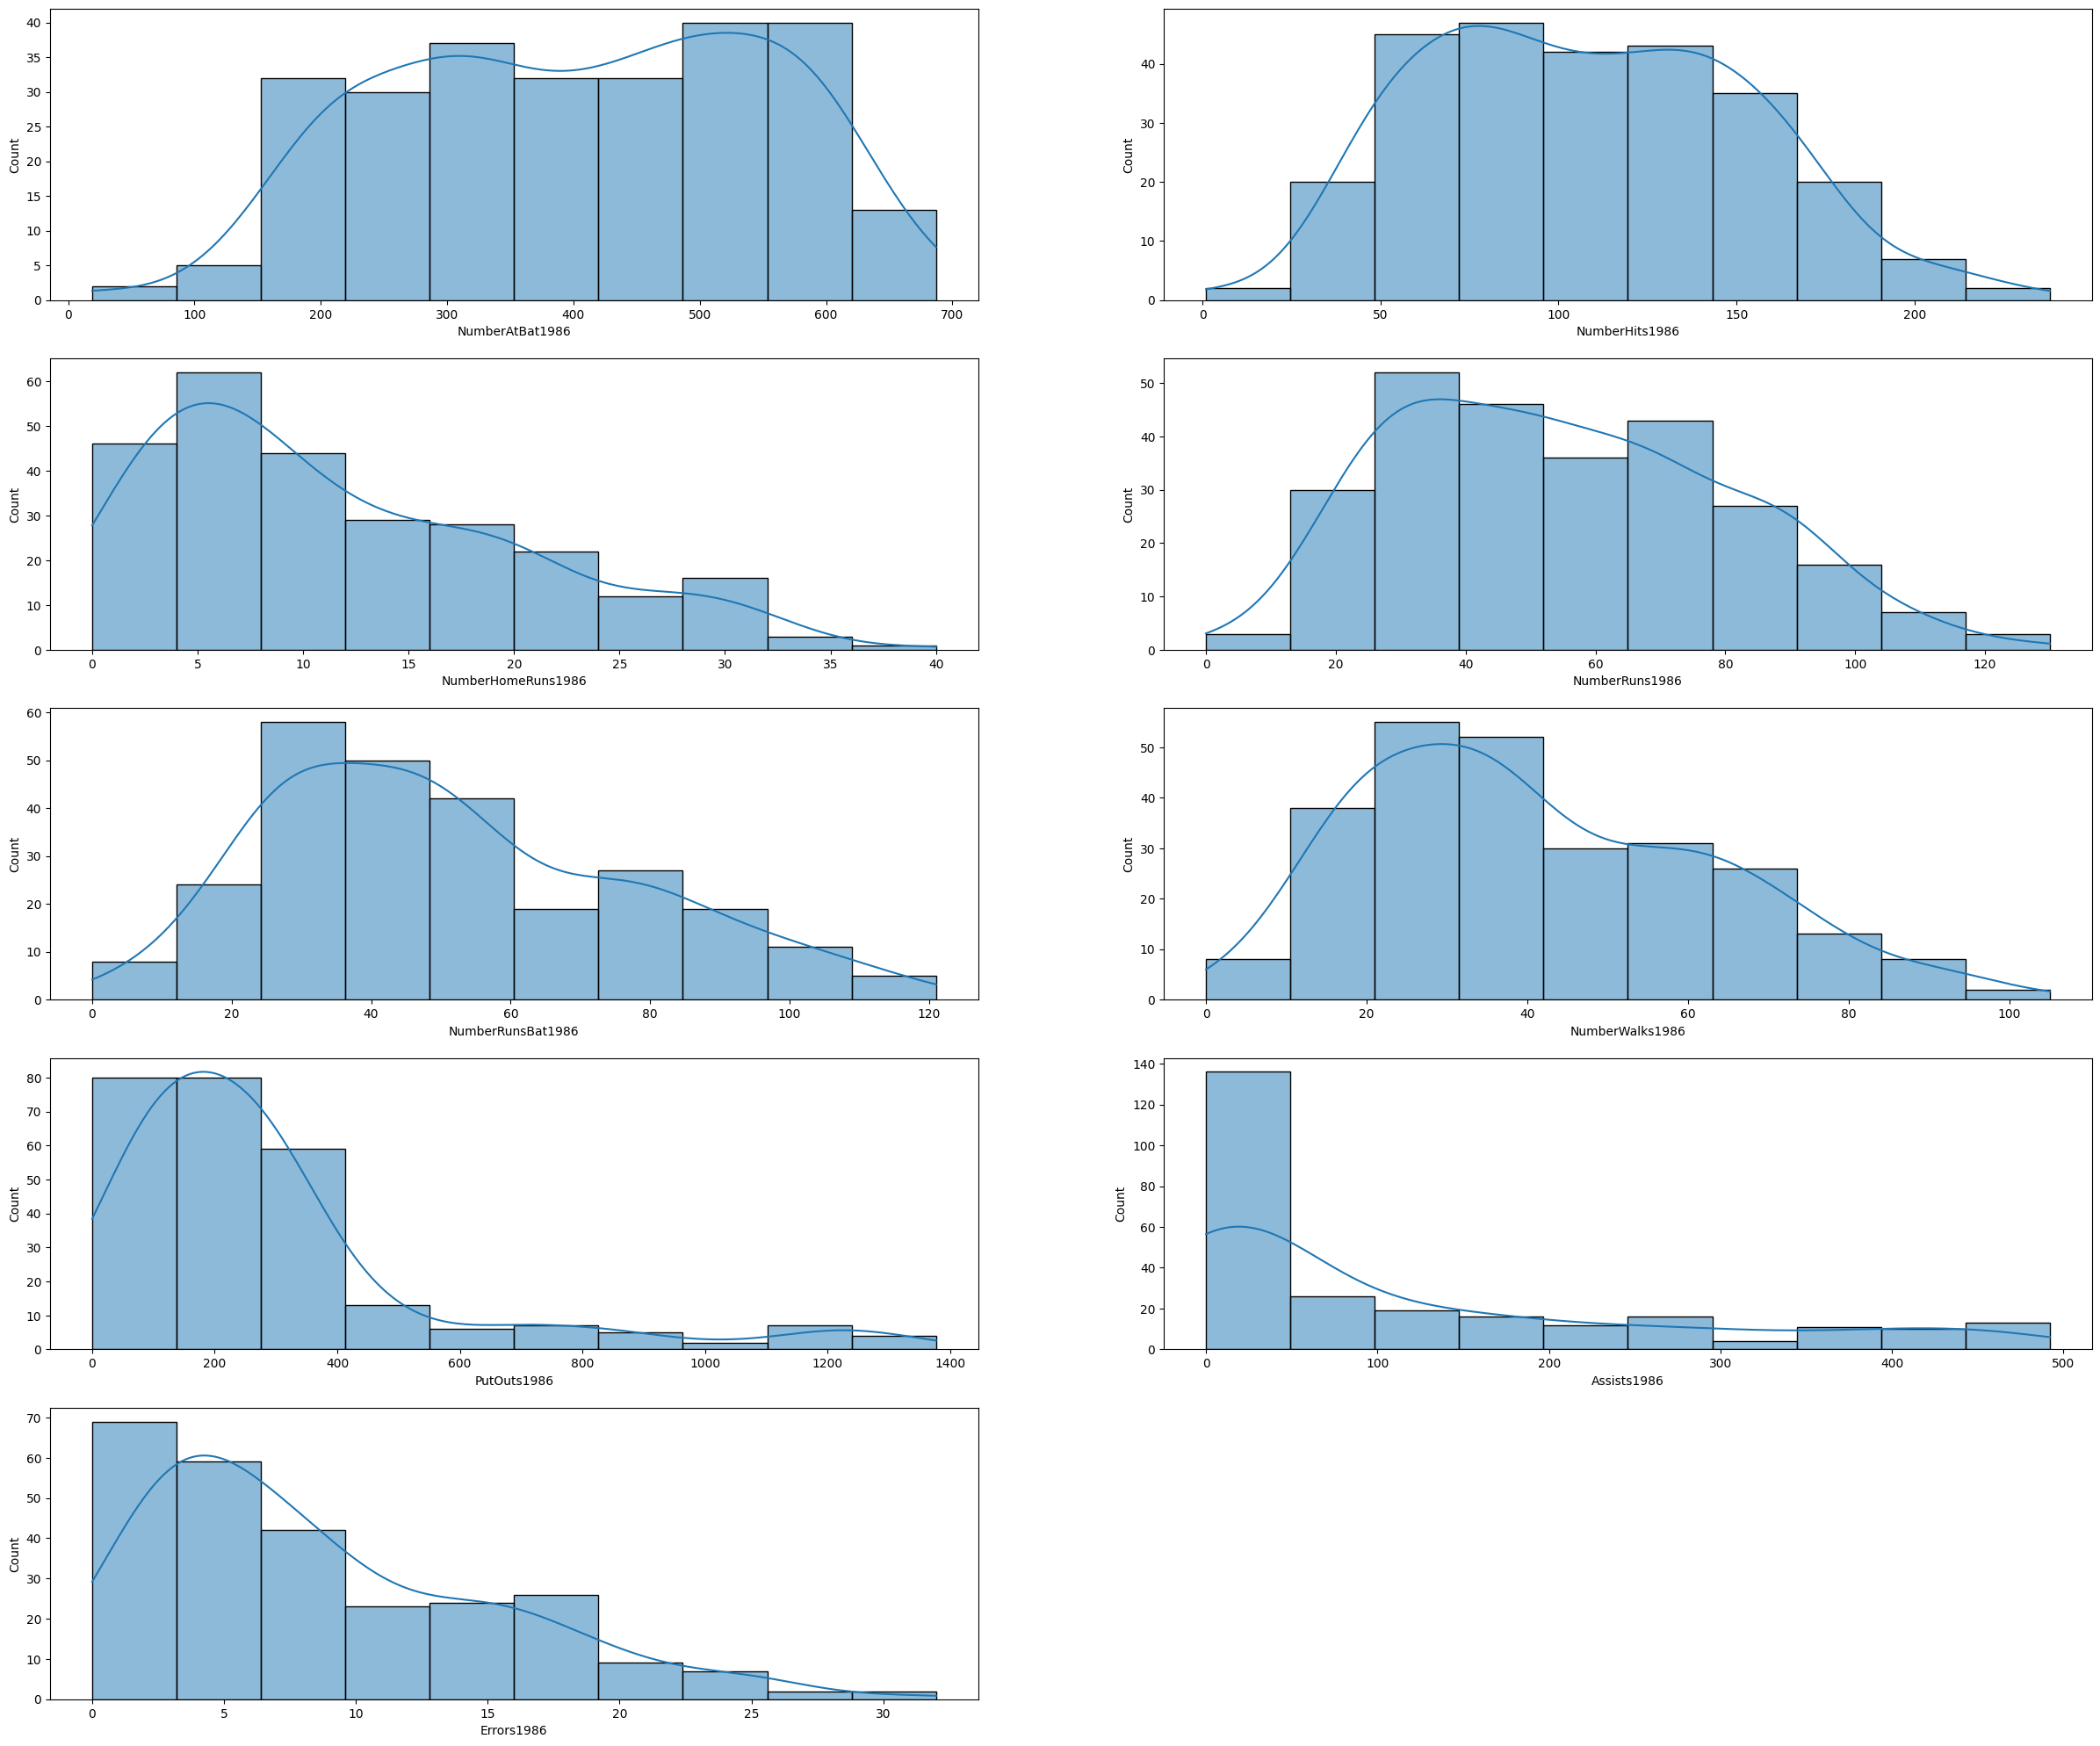

In [21]:
plt.figure(figsize=(30,25))
for i,col in enumerate(performance_columns_1986,1):
    plt.subplot(5,2,i)
    sns.histplot(hitters[col],kde=True,bins = 10)

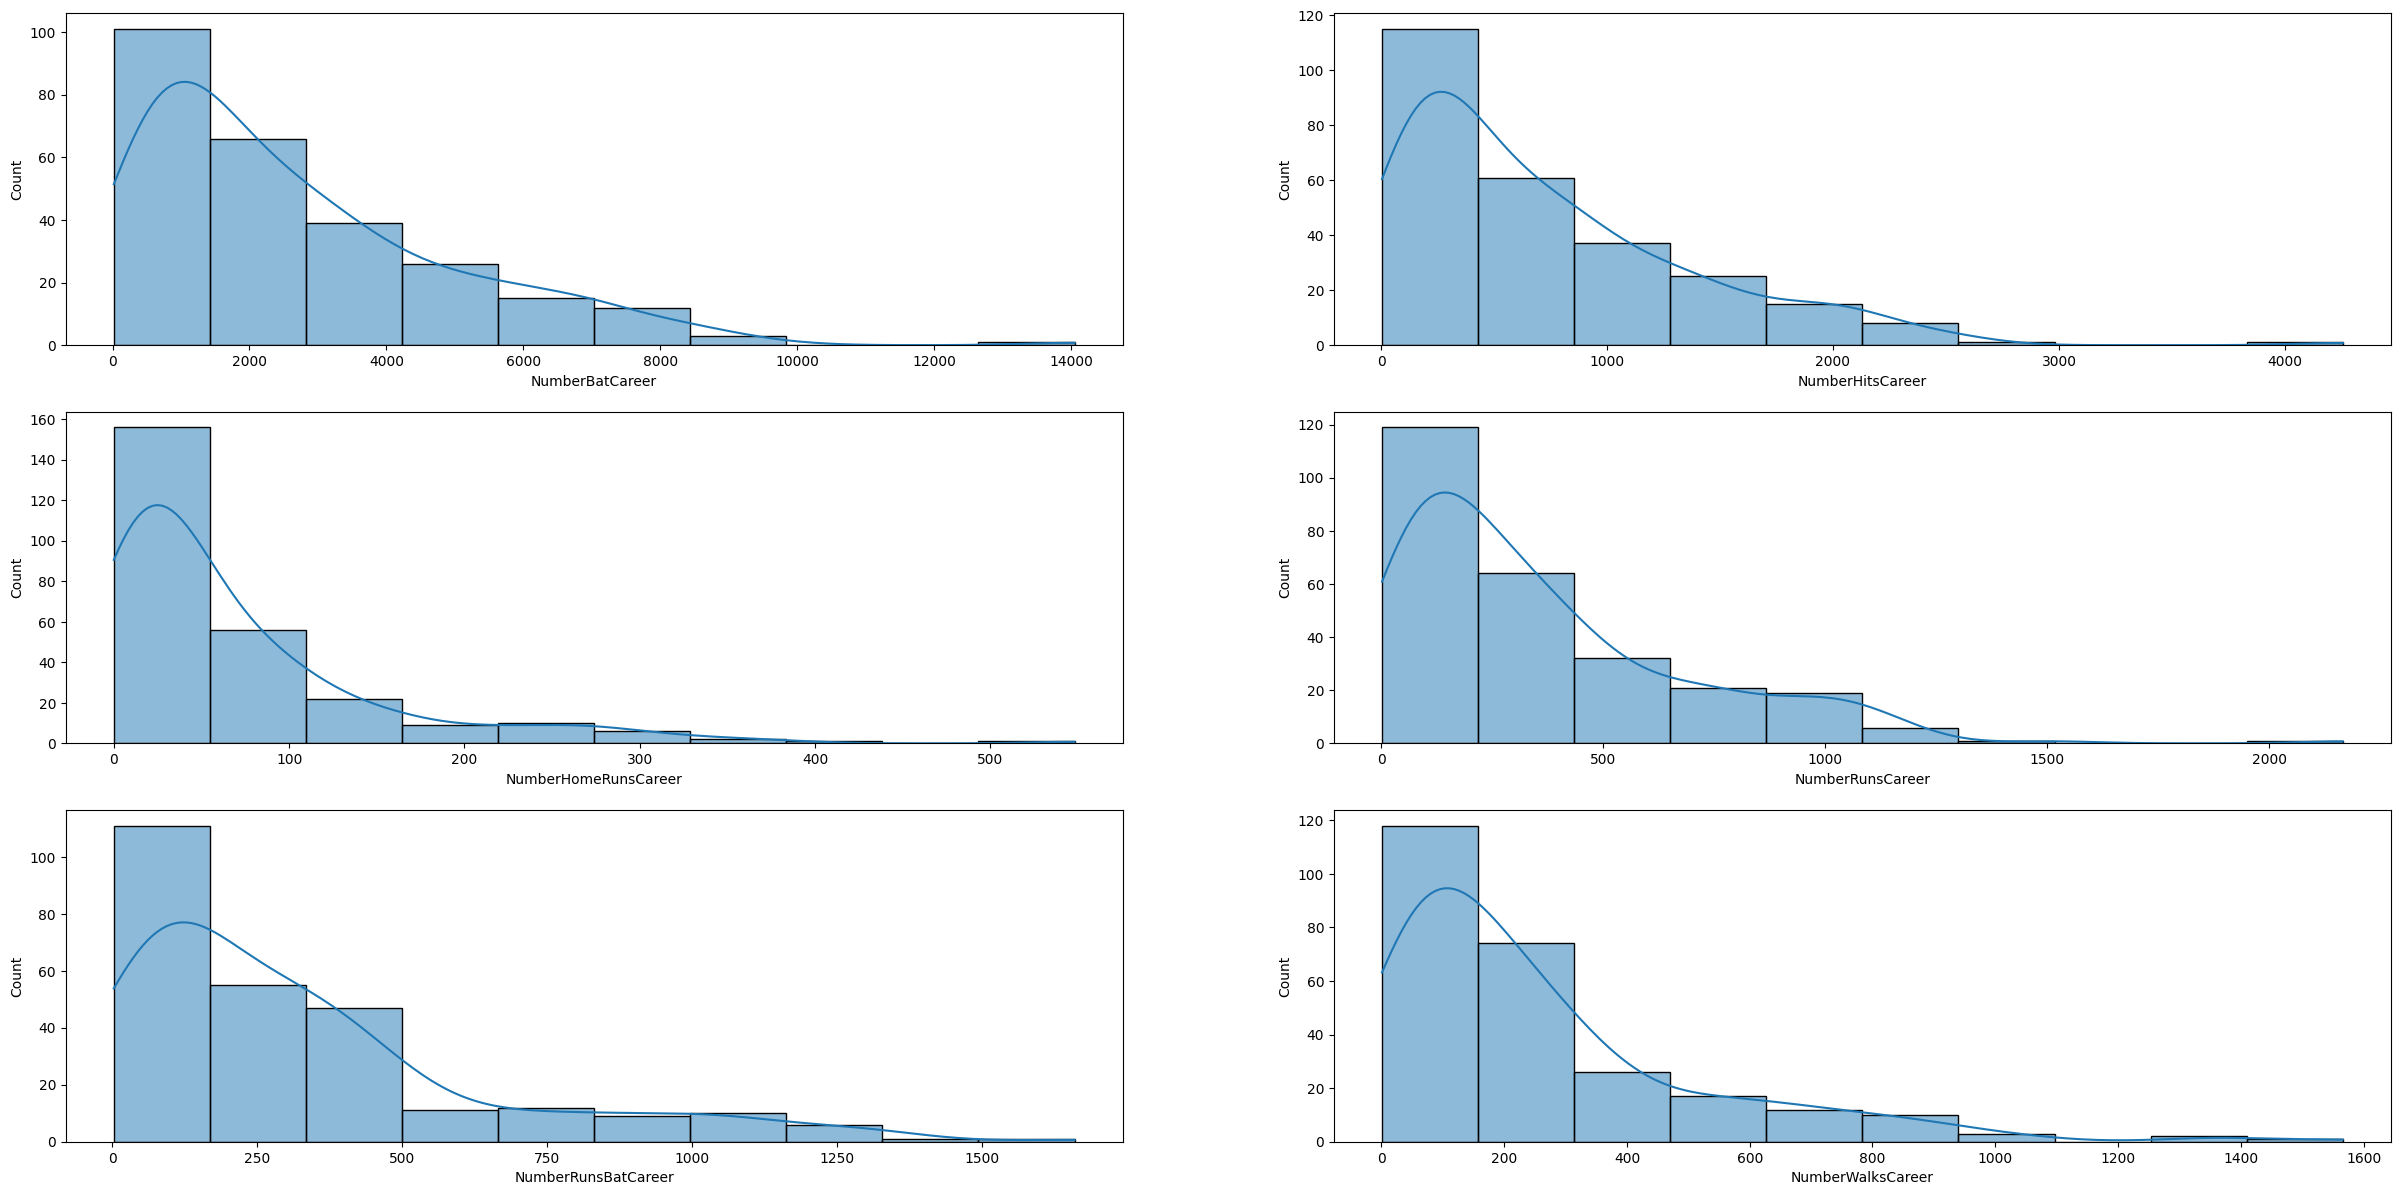

In [22]:
plt.figure(figsize=(30,25))
for i,col in enumerate(career_performance_columns,1):
    plt.subplot(5,2,i)
    sns.histplot(hitters[col],kde=True,bins = 10)

- Our assumptions were true that there are lot of outliers in most of the columns especially for the career performance columns. 
- But they are not outliers, they are valid values for example, we observe that the salaries are right sqewed explaining that there are few high paid players. 
- We cannot exclude them so we shall go ahead and apply transformations.
- Since the skewed columns are continous and there are no negative values, It is perfect that we choose to apply log(x+1) transformations on relevant columns where we observe sqewness and we shall then see if the distribution is normal.
- log(x+1) so as to avoid places where values are zero.



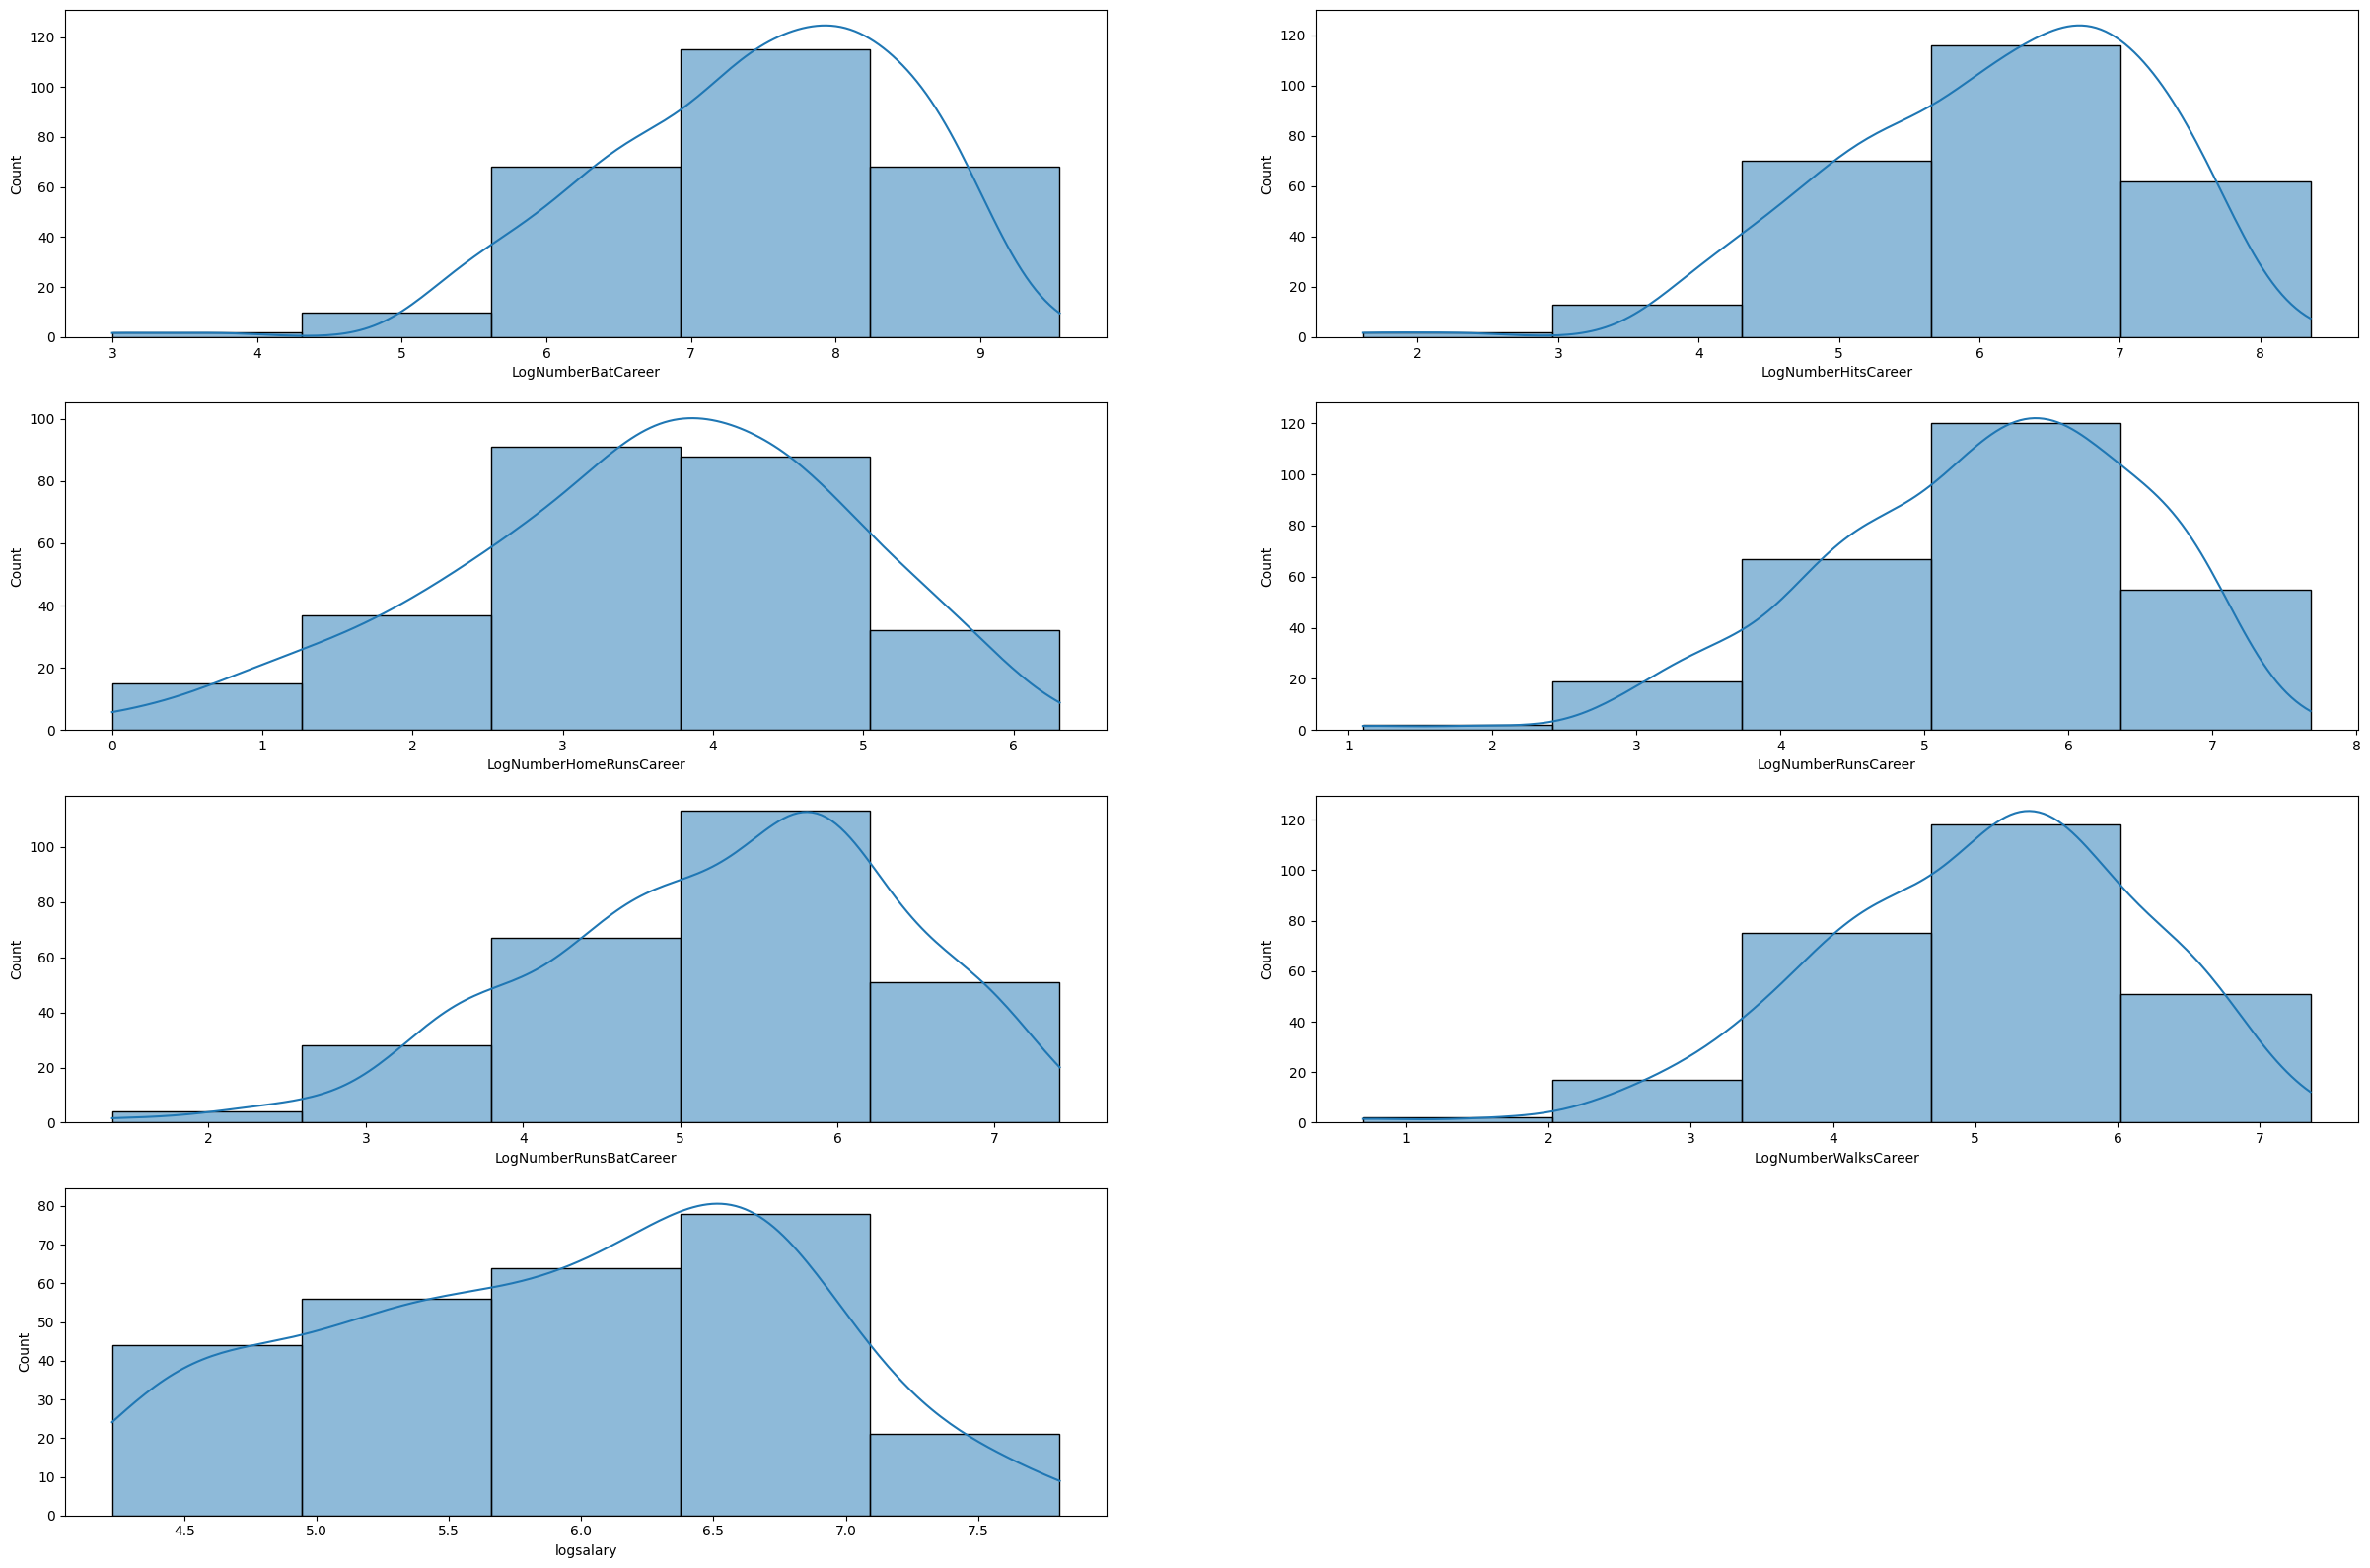

In [25]:

log_applicable_columns = [*career_performance_columns]
hitters["logsalary"] = np.log(hitters['AnnualSalaryOpenDay1987']+1)
for col in log_applicable_columns:
  hitters["Log"+col] = np.log(hitters[col]+1)

# Switch to new columns which are log applied ones
performance_columns_1986 = [
    "NumberAtBat1986",'NumberHits1986', 'NumberHomeRuns1986', 'NumberRuns1986', 'NumberRunsBat1986', 'NumberWalks1986', 'PutOuts1986', 'Assists1986', 'Errors1986',
]
career_performance_columns = [
    'LogNumberBatCareer', 'LogNumberHitsCareer', 'LogNumberHomeRunsCareer', 'LogNumberRunsCareer', 'LogNumberRunsBatCareer', 'LogNumberWalksCareer',
]

target_column = ["logsalary"]



plt.figure(figsize=(30,25))
for i,col in enumerate([*log_applicable_columns, "logsalary"],1):
    plt.subplot(5,2,i)
    sns.histplot(hitters[col],kde=True,bins = 5)



Now we see that they are normally distributed and also have a dataset ready to perform the distribution. We shall quickly to the same steps for the pitchers data and continue to build the model that predicts the salary and identify the important performance features that explain the variation in salary.

**********Identify Null******************
PitcherName                      0
TeamEnd1986                      0
LeagueEnd1986                    0
NumberWins1986                   0
NumberLoss1986                   0
EarnedRunAvg1986                 0
NumberGames1986                  0
NumberInningsPitched1986         0
NumberSaves1986                  0
NumberYearsMajorLeague           0
NumberWinsCareer                 0
NumberLossCareer                 0
EarnedRunAvgCareer               0
NumberGamesCareer                0
NumberInningsPitchedCareer       0
NumberSavesCareer                0
AnnualSalaryOpenDay1987          0
League1987                       0
Team1987                         0
LeagueEnd1986Vals                0
TeamEnd1986Vals                  0
League1987Vals                   0
Team1987Vals                     0
logsalary                        0
LogNumberSaves1986               0
LogNumberWinsCareer              0
LogNumberLossCareer              0
LogNumberGame

/Users/bhargavcn/NEU_Projects/baseball-performance-analysis/venv/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/bhargavcn/NEU_Projects/baseball-performance-analysis/venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:4620: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/bhargavcn/NEU_Projects/baseball-performance-analysis/venv/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/bhargavcn/NEU_Projects/baseball-performance-analysis/venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:4620: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/bhargavcn/NEU_Projects/baseball-performance-analysis/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: Runt

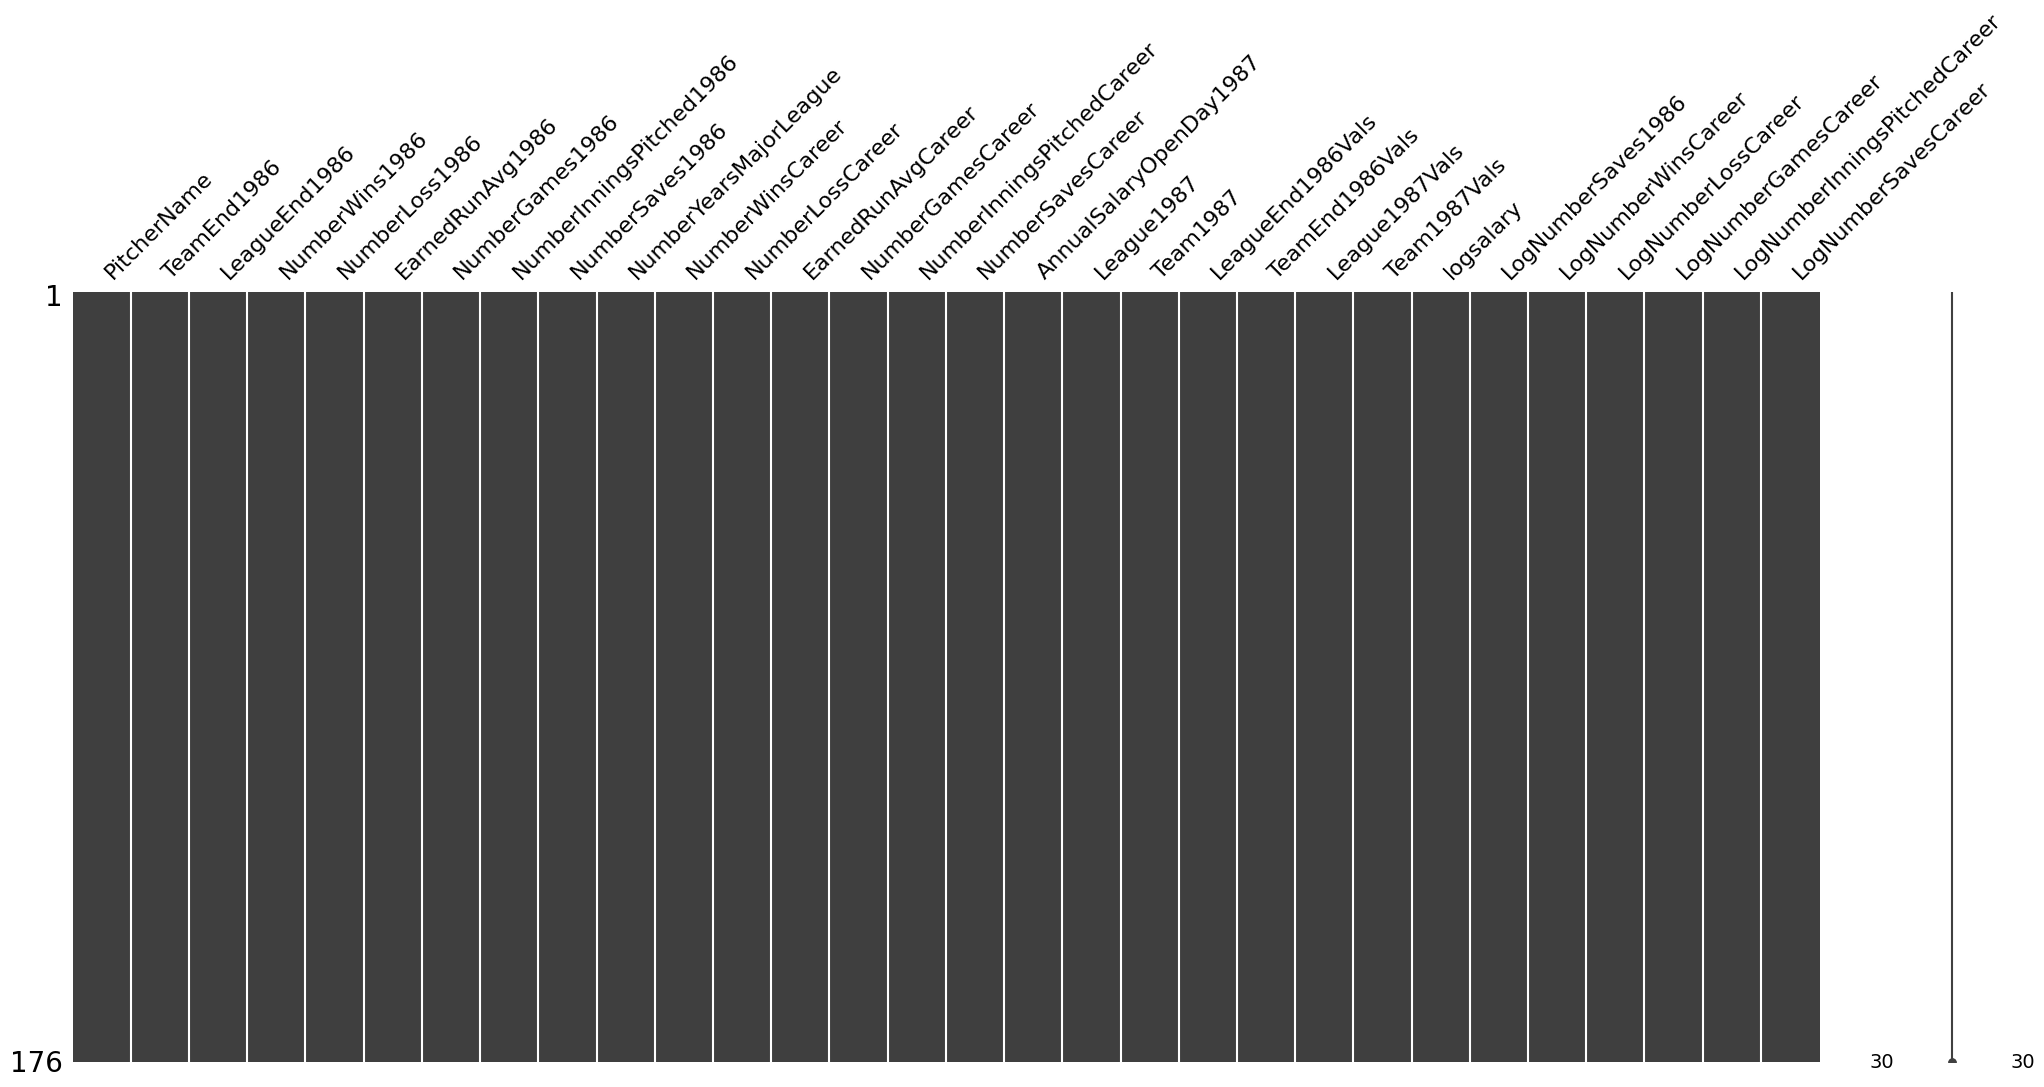

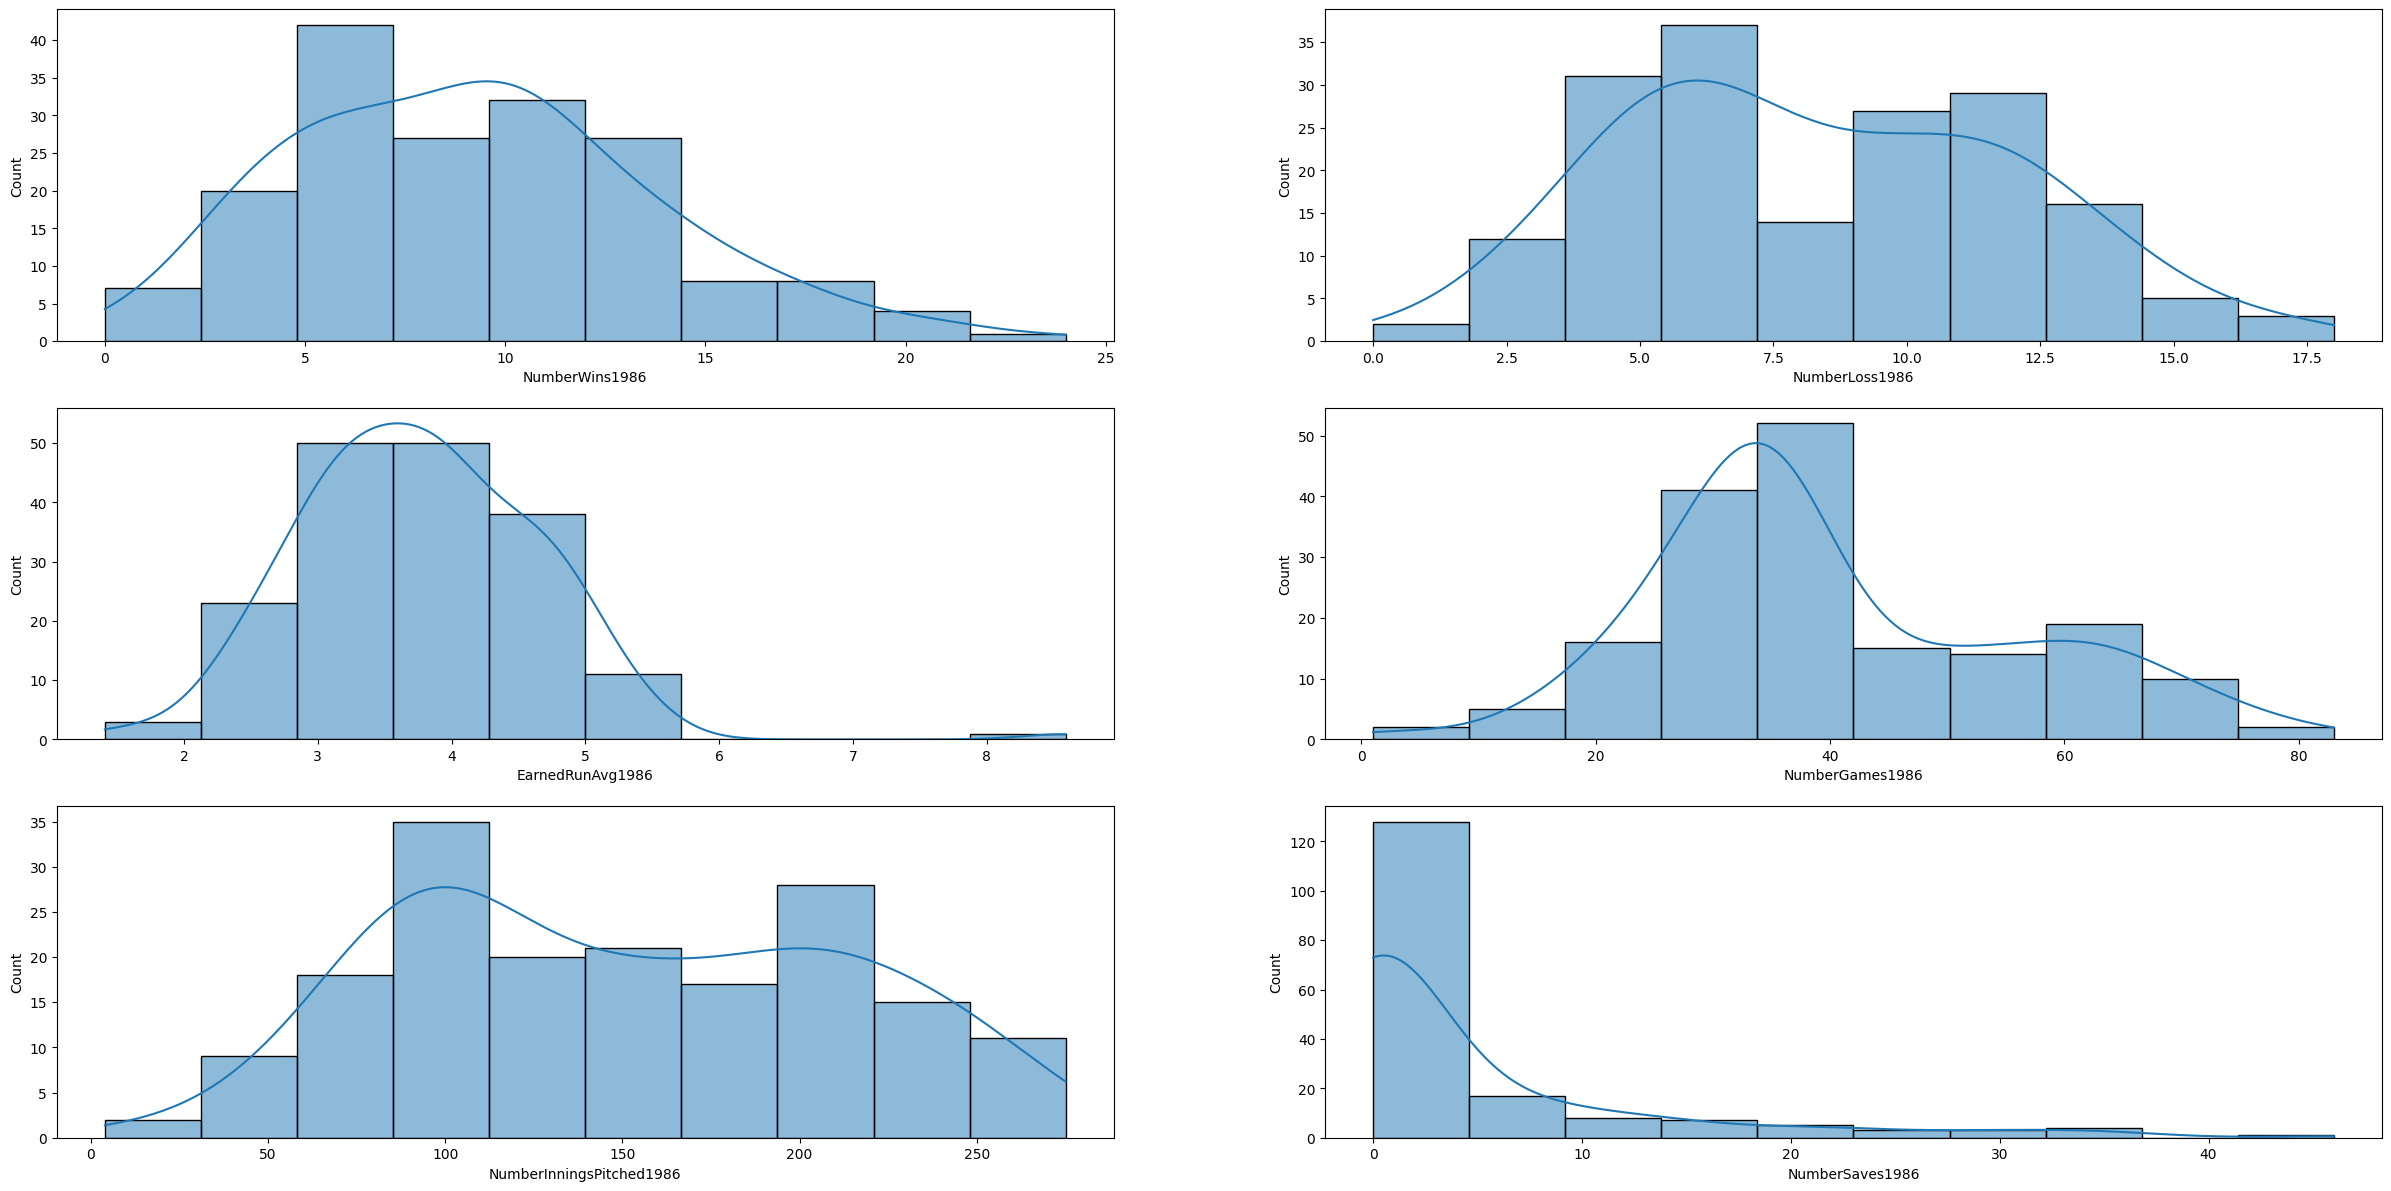

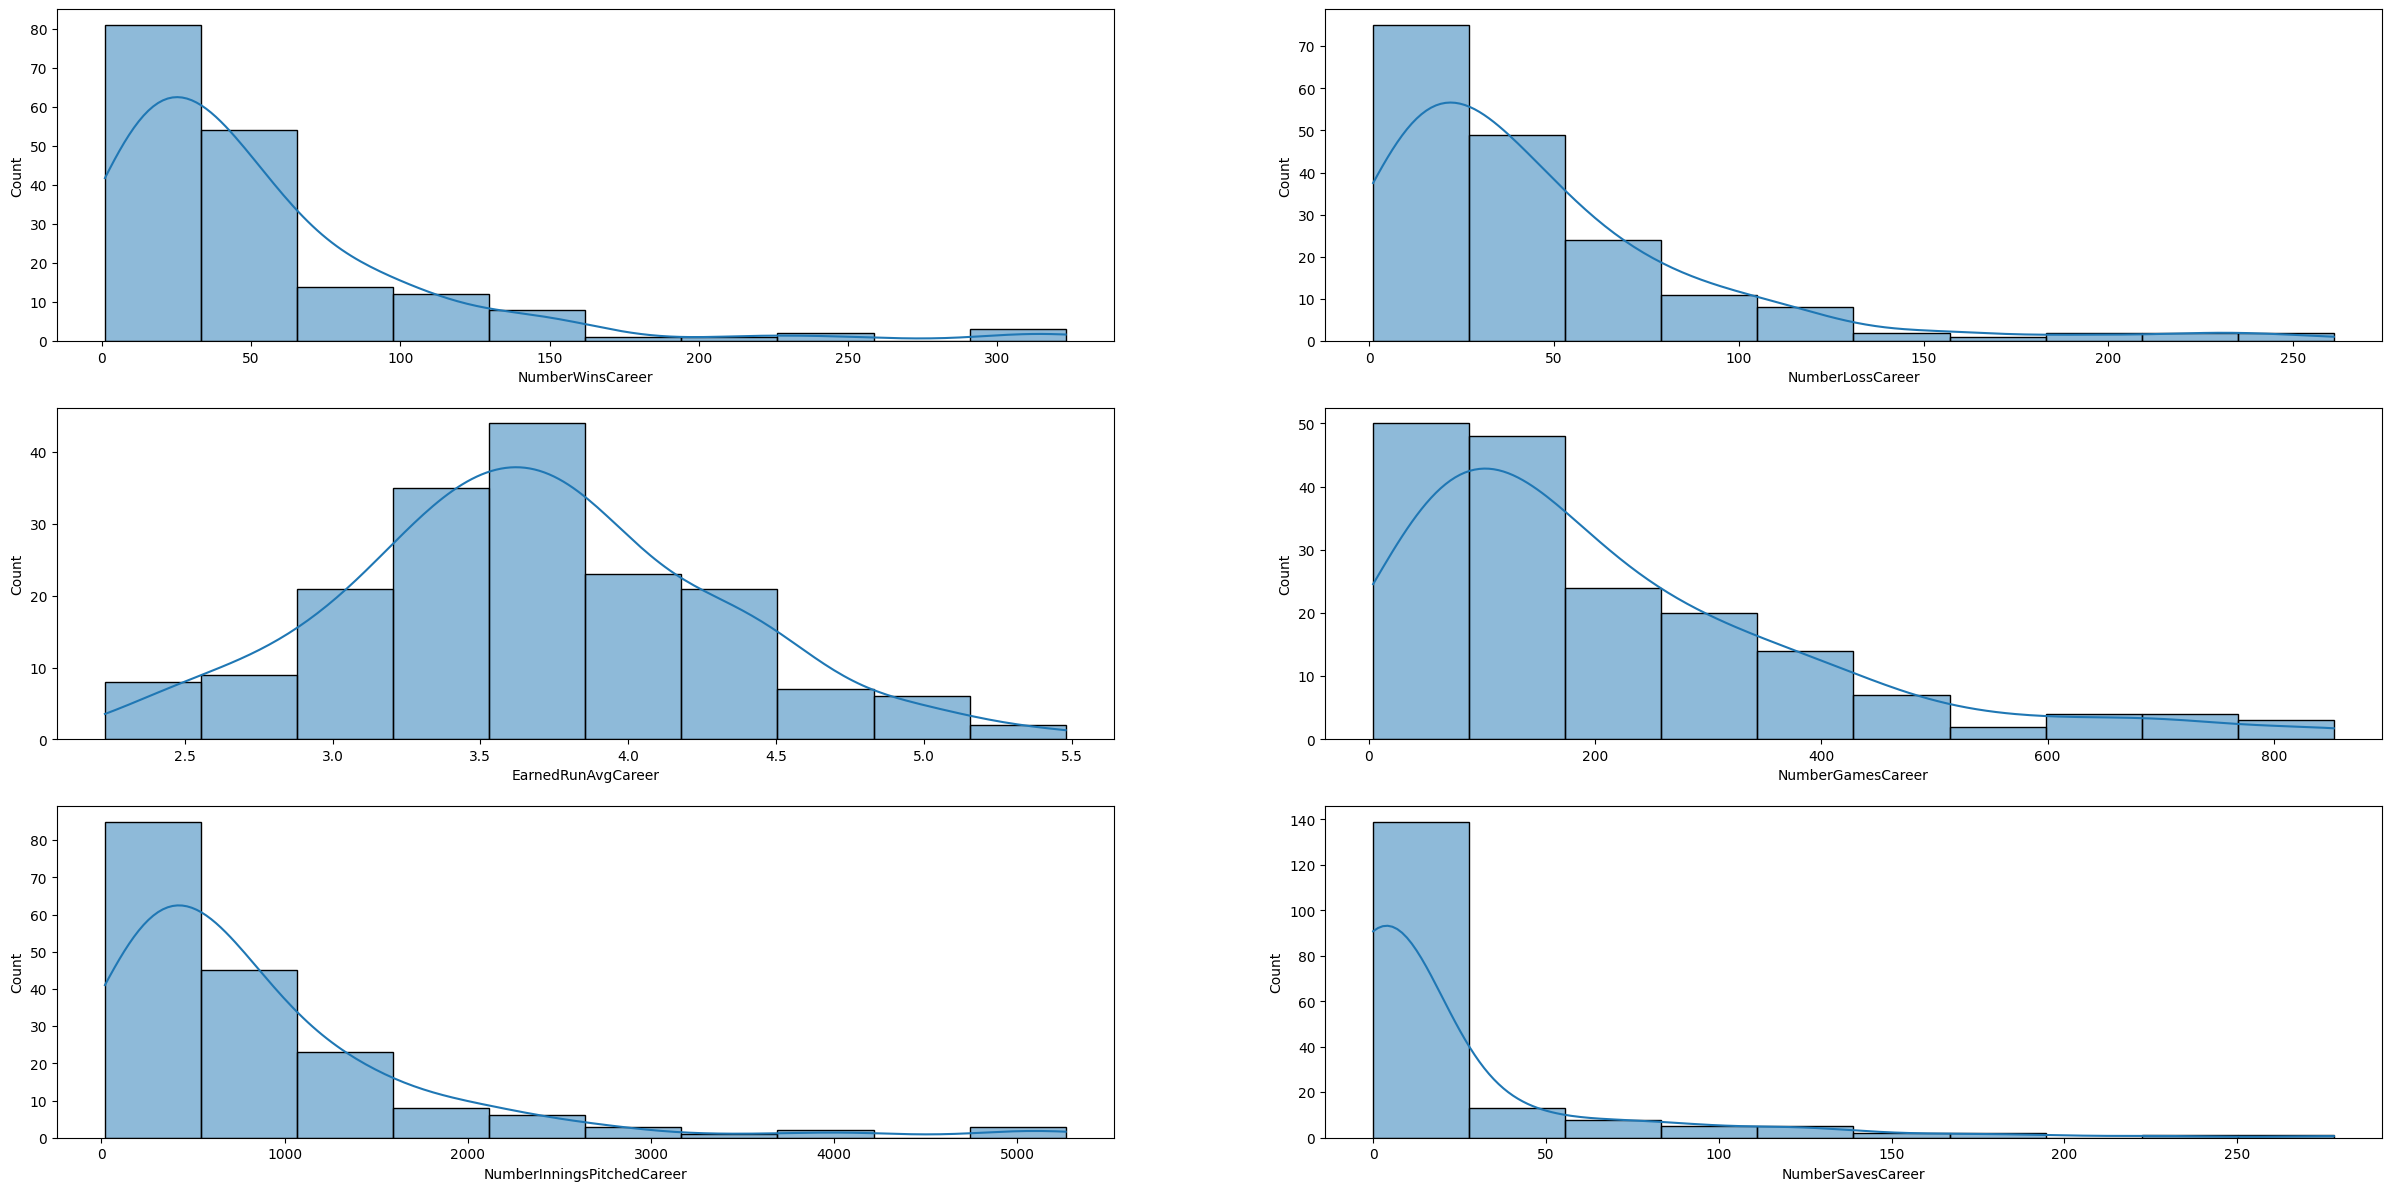

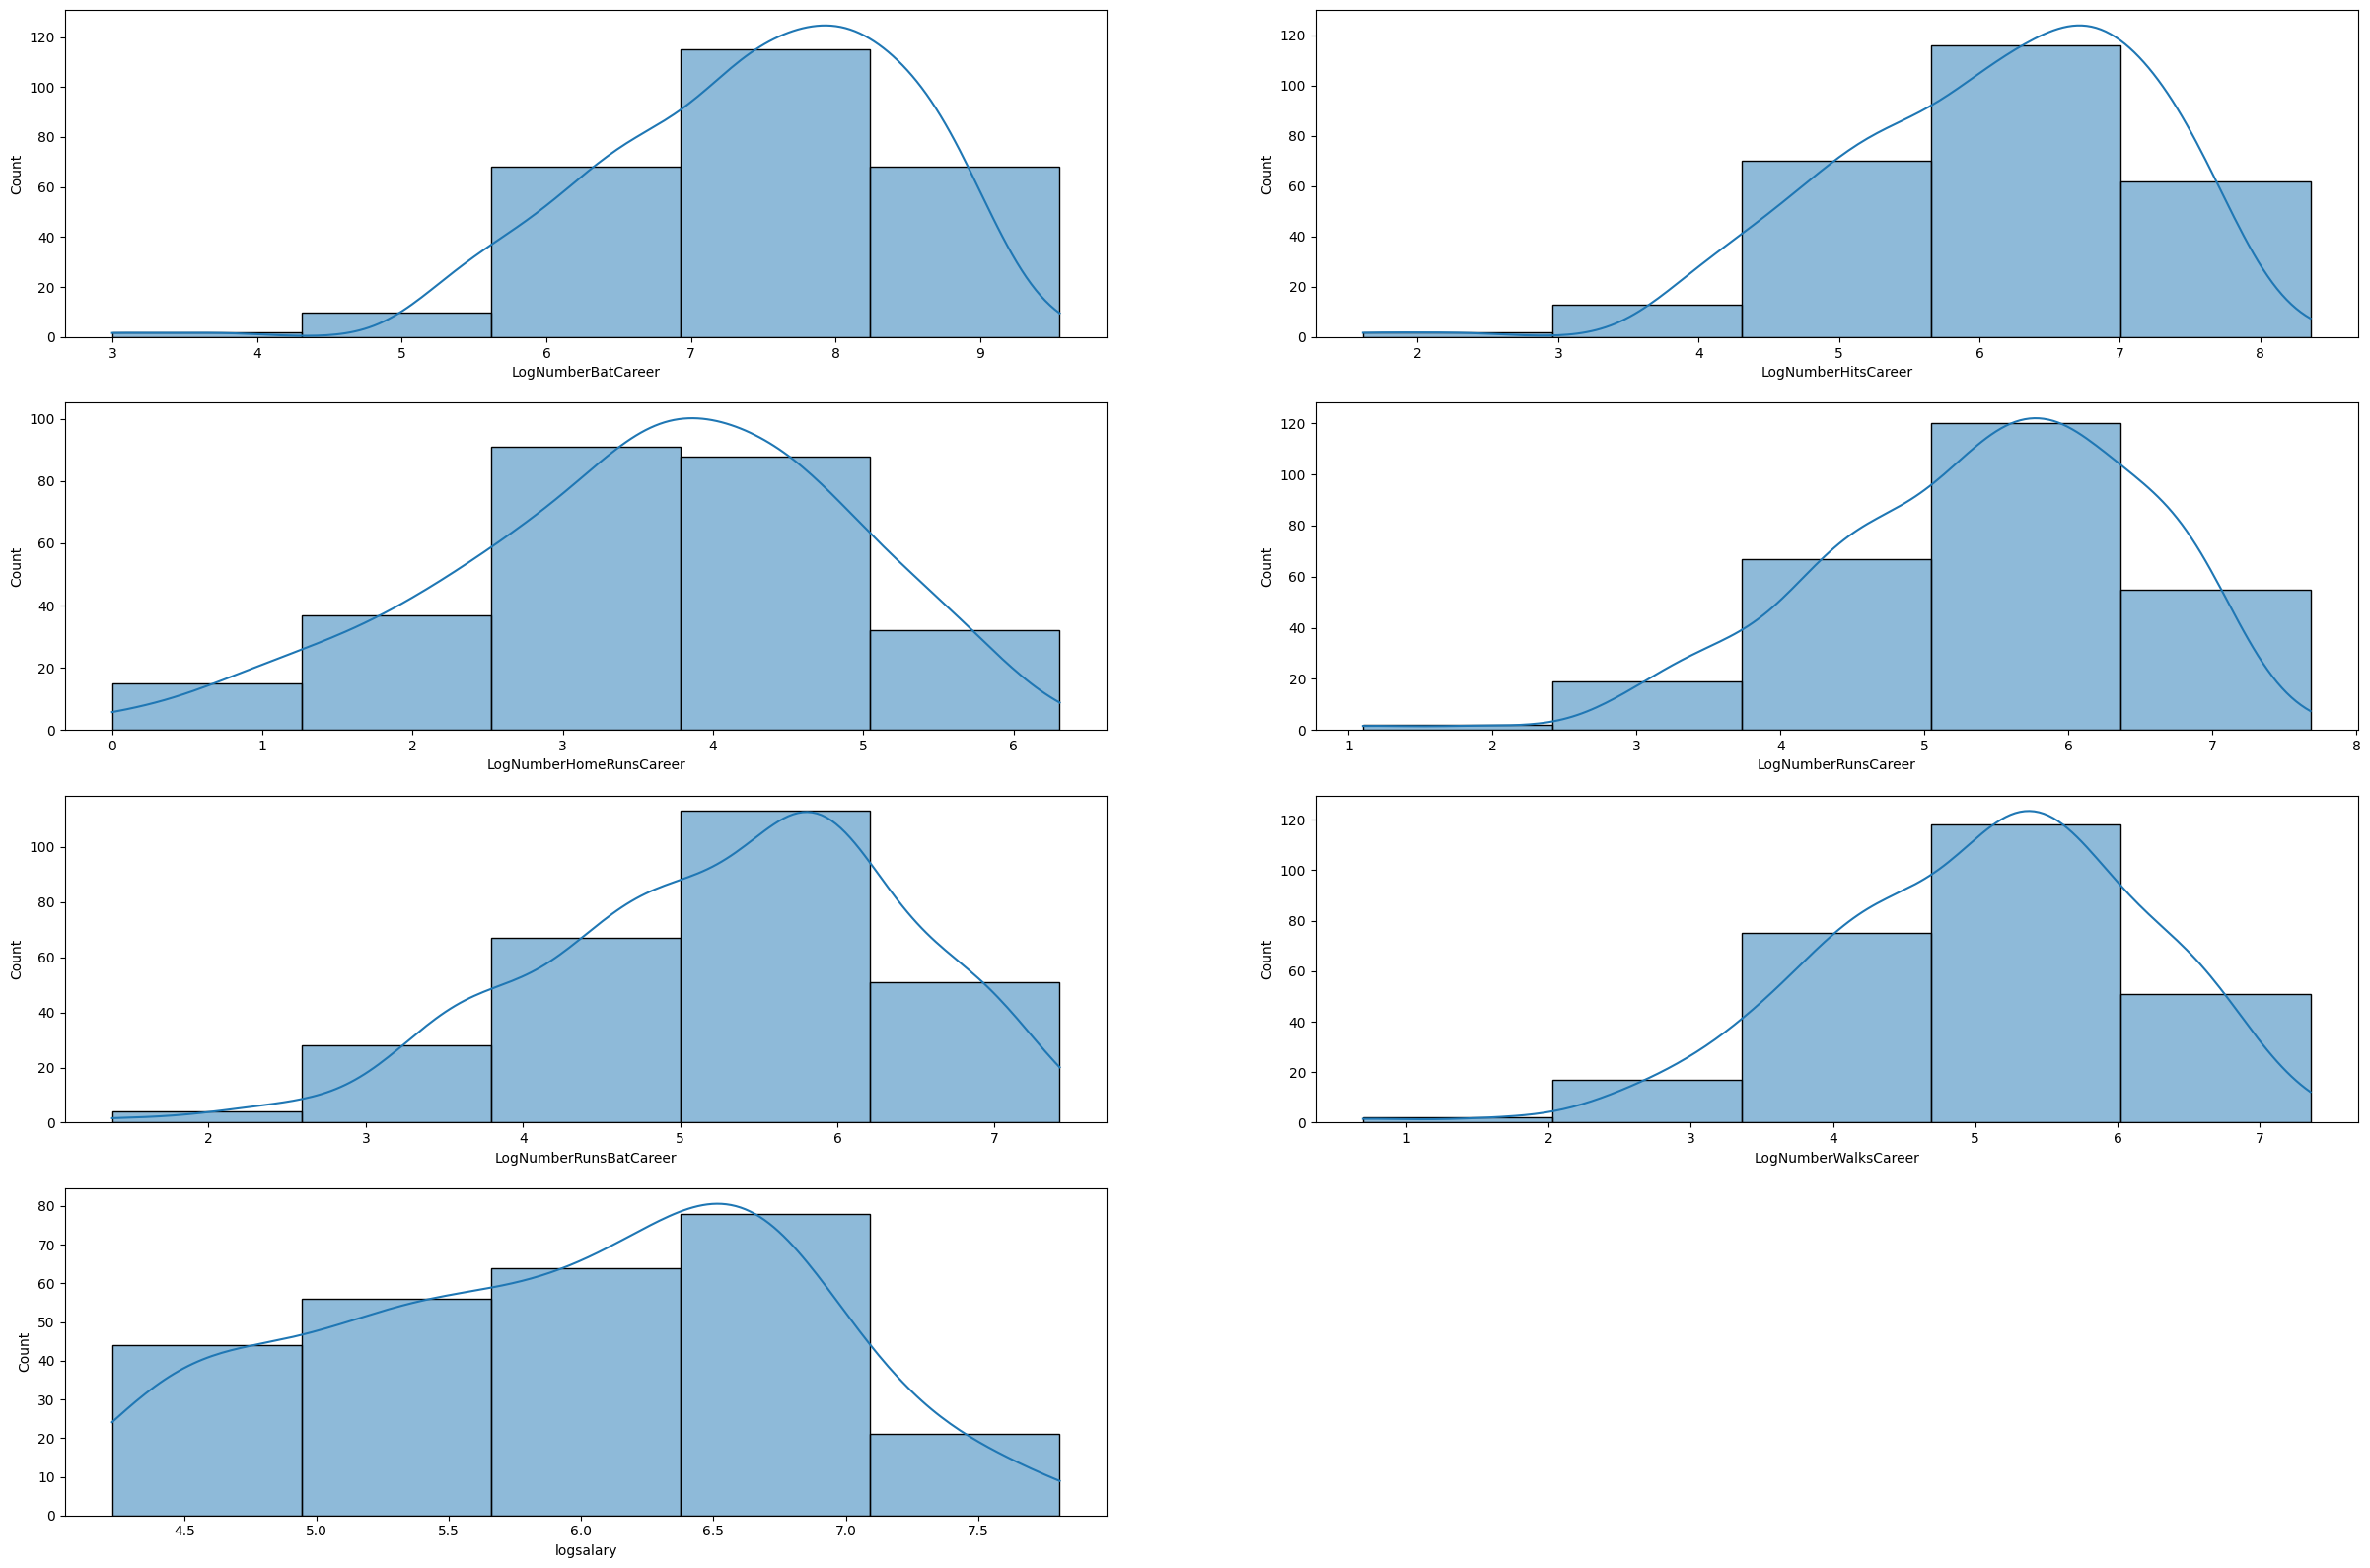

In [30]:
print("**********Identify Null******************")
print(pitchers.isnull().sum()) # Identify null values
print("**********Visualize Null******************")
print(msno.matrix(pitchers)) # We observe 30 null values and we shall go ahead and drop them similar to hitters
pitchers = pitchers.dropna()
pitchers.isnull().sum()
print("**********Shape after null drop******************")
print(pitchers.shape)
# Transform the abbrevations using the team league and division mapping
pitchers["LeagueEnd1986Vals"] = pitchers["LeagueEnd1986"].transform(transform_labels(LEAGUE_MAPPINGS))
pitchers["TeamEnd1986Vals"] = pitchers["TeamEnd1986"].transform(transform_labels(TEAM_NAME_MAPPINGS))
pitchers["League1987Vals"] = pitchers["League1987"].transform(transform_labels(LEAGUE_MAPPINGS))
pitchers["Team1987Vals"] = pitchers["Team1987"].transform(transform_labels(TEAM_NAME_MAPPINGS))
print("**********Pitchers after transformations ******************")
print(pitchers.head())

# Identify the columns as per interest similar to hitters
pitchers_performance_1986 = ["NumberWins1986","NumberLoss1986","EarnedRunAvg1986","NumberGames1986","NumberInningsPitched1986","NumberSaves1986"]
pitchers_performance_career = ["NumberWinsCareer","NumberLossCareer","EarnedRunAvgCareer","NumberGamesCareer","NumberInningsPitchedCareer","NumberSavesCareer"]
pitchers_non_performance_metrics = ["TeamEnd1986","LeagueEnd1986","NumberYearsMajorLeague","League1987","Team1987"]
pitchers_target = ["AnnualSalaryOpenDay1987"]

# Identify any outliers
print("**********Pitchers Description ******************")
print(pitchers.describe())
# We suspect outliers so we plot to find any
print("**********Pitchers Dsitribution Visualization ******************")
plt.figure(figsize=(30,25))
for i,col in enumerate(pitchers_performance_1986,1):
    plt.subplot(5,2,i)
    print(sns.histplot(pitchers[col],kde=True,bins = 10))
plt.figure(figsize=(30,25))
for i,col in enumerate(pitchers_performance_career,1):
    plt.subplot(5,2,i)
    print(sns.histplot(pitchers[col],kde=True,bins = 10))
#Apply log transformations on the skewed columns
log_applicable = ["NumberSaves1986", "NumberWinsCareer","NumberLossCareer","NumberGamesCareer","NumberInningsPitchedCareer","NumberSavesCareer"]
pitchers["logsalary"] = np.log(pitchers['AnnualSalaryOpenDay1987'])
for col in log_applicable:
  pitchers["Log"+col] = np.log(pitchers[col])

# Redefine the seggregation of columns
pitchers_performance_1986 = ["NumberWins1986","NumberLoss1986","EarnedRunAvg1986","NumberGames1986","NumberInningsPitched1986","LogNumberSaves1986"]
pitchers_performance_career = ["LogNumberWinsCareer","LogNumberLossCareer","EarnedRunAvgCareer","LogNumberGamesCareer","LogNumberInningsPitchedCareer","LogNumberSavesCareer"]
pitchers_non_performance_metrics = ["TeamEnd1986Vals","LeagueEnd1986Vals","NumberYearsMajorLeague","League1987Vals","Team1987Vals"]
pitchers_target = ["logsalary"]

# Visualize the distribution after application of log
plt.figure(figsize=(30,25))
for i,col in enumerate([*log_applicable_columns, "logsalary"],1):
    plt.subplot(5,2,i)
    sns.histplot(hitters[col],kde=True,bins = 5)


### Regression against player's salary
Now that we have our required columns all ready and set with both the datasets of pitchers and hitters, we shall go ahead and apply our regression.<br/>
First, we construct an heatmap for correaltion of the required features.

<Axes: >

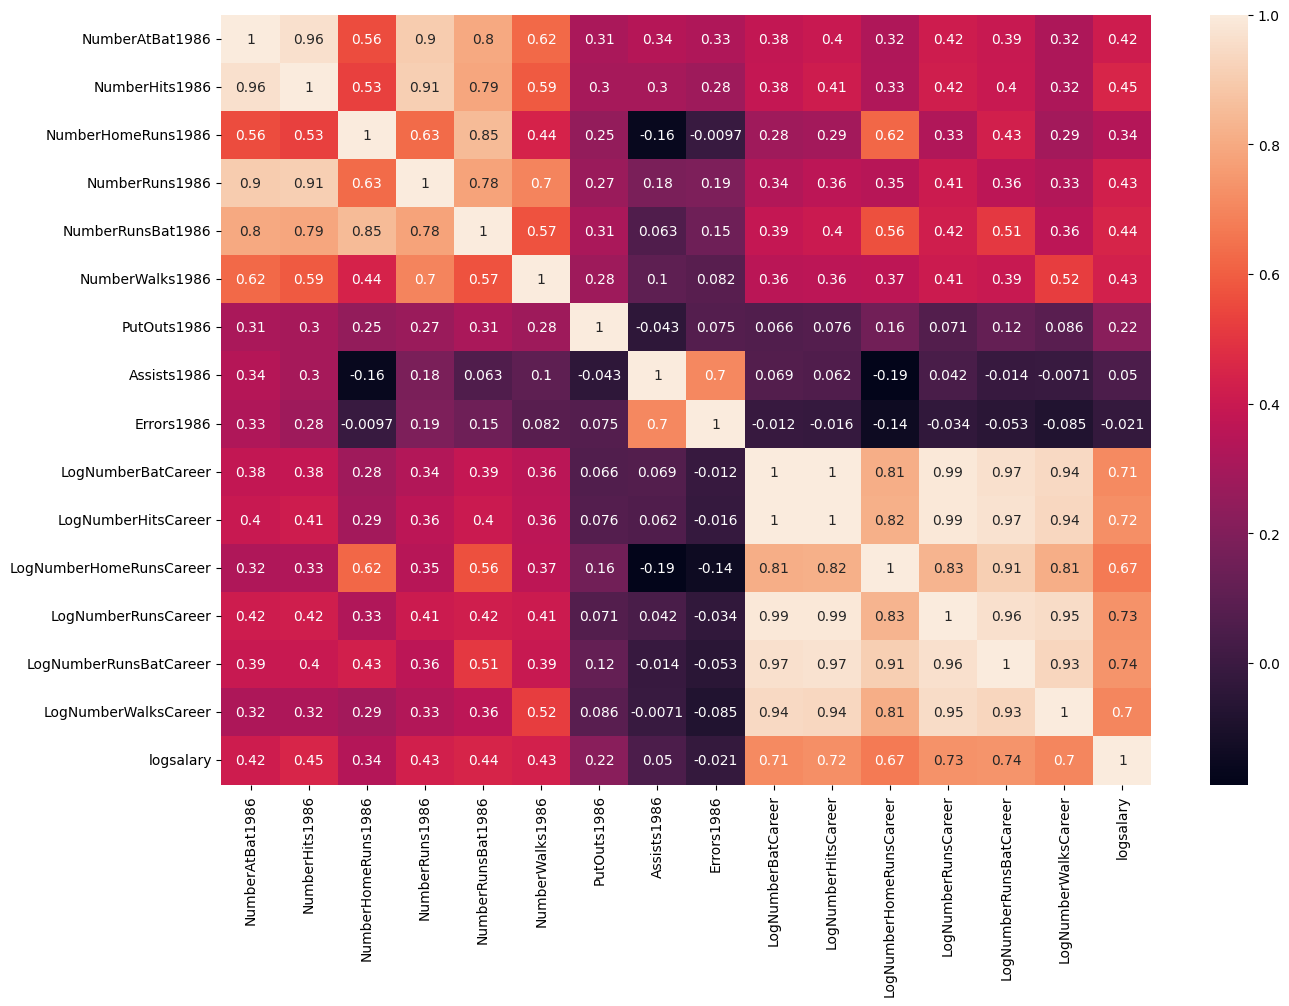

In [31]:
plt.figure(figsize=(15,10))

sns.heatmap(hitters[[*performance_columns_1986, *career_performance_columns, "logsalary"]].corr(),annot = True)

We see that there is high correlation in the 1986 performance metrics and career metrics columns for the salary for pitchers. Let's check the same for pitchers.

<Axes: >

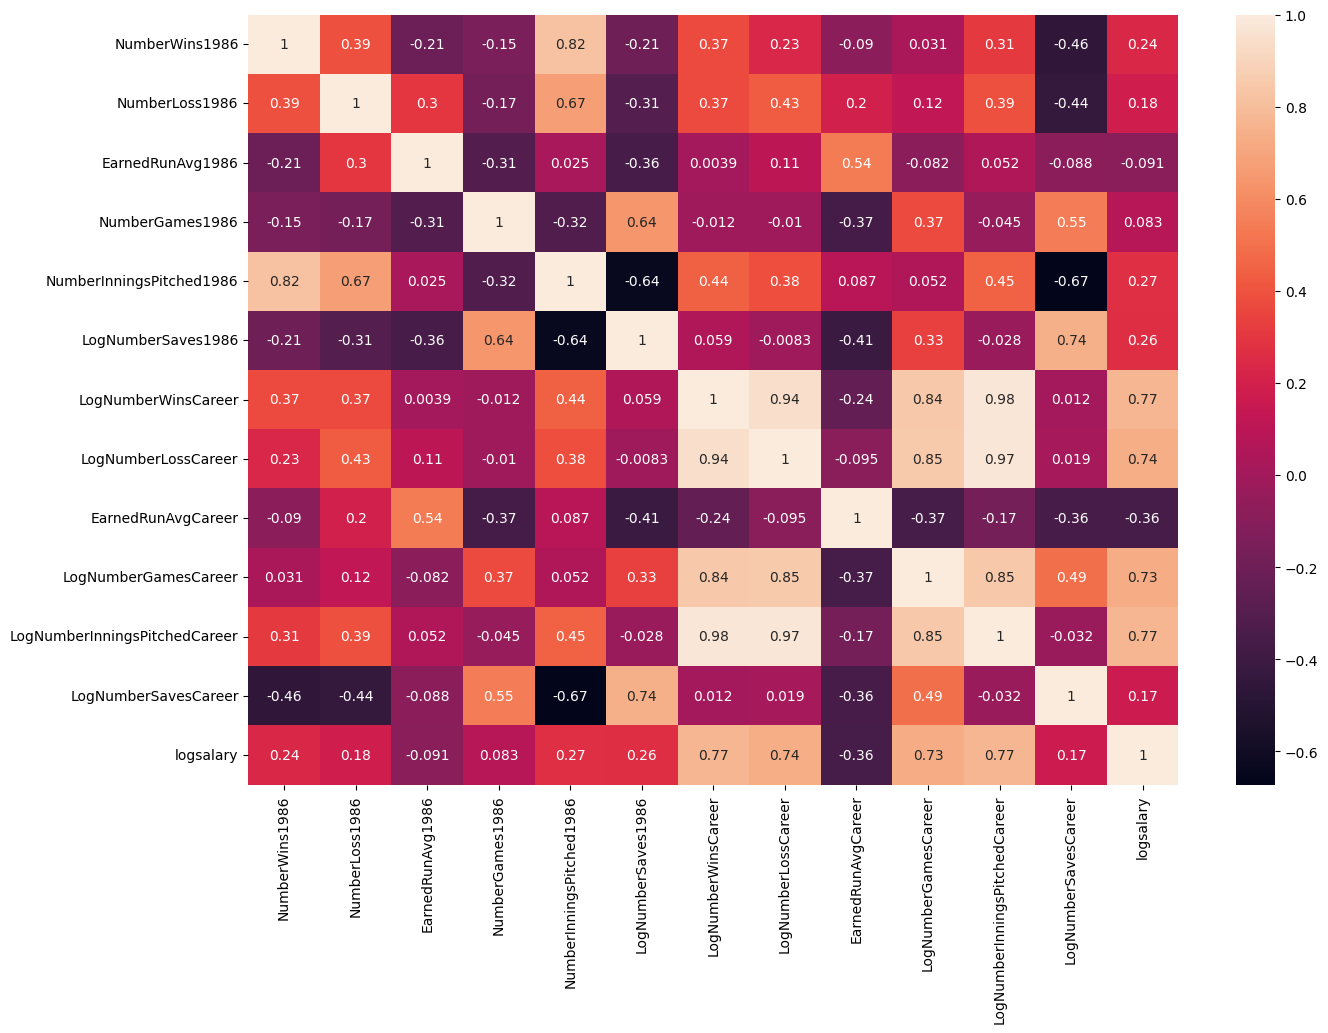

In [32]:
plt.figure(figsize=(15,10))

sns.heatmap(pitchers[[*pitchers_performance_1986, *pitchers_performance_career, "logsalary"]].corr(),annot = True)

Pitchers Correlations: 
- Highest Positive correlation is observed overall career performance metrics
- High correlation also exists between the performance in 1986 with highest among them explained by Number of runs batted

Before proceeding, lets cross verify if the pair plots of the metrics also show visual coorelations.

***********************Hitters Pair plot against salary***********************


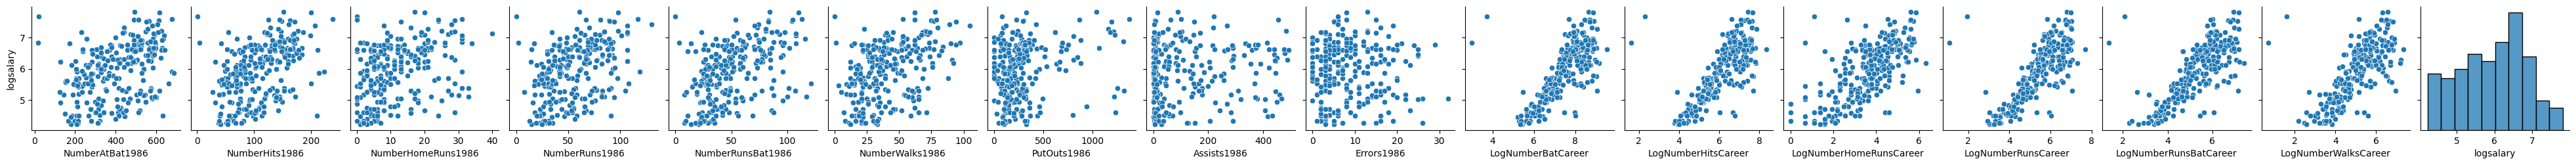

In [33]:
print("***********************Hitters Pair plot against salary***********************")
sns.pairplot(hitters[[*performance_columns_1986, *career_performance_columns, *target_column]],y_vars=hitters[target_column])

***********************Pitchers Pair plot against salary***********************


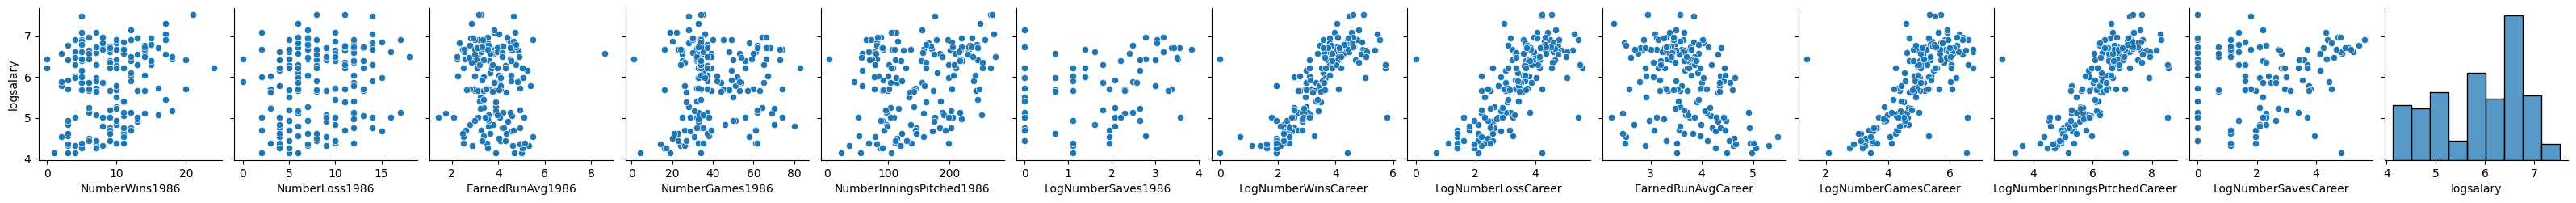

In [34]:
print("***********************Pitchers Pair plot against salary***********************")
sns.pairplot(pitchers[[*pitchers_performance_1986, *pitchers_performance_career, *target_column]],y_vars=pitchers[target_column])

We observe that the following pairplots confirm the correlation from the heatmap, so we continue with our analysis by using linear regression model summary to find interesting features that influence the salary.
We first check if all data are in same scale else we scale it so that the results of regression is not driven by higher values of some columns.

<Axes: >

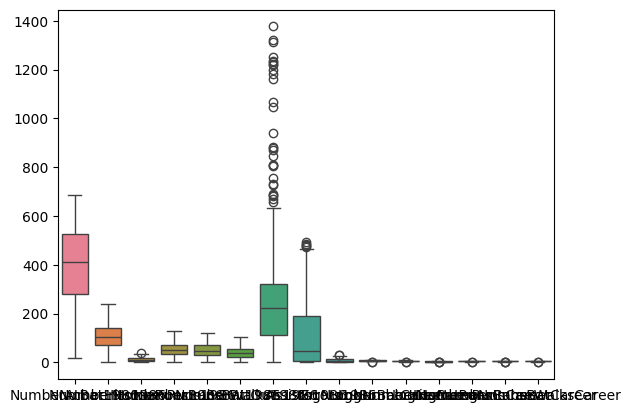

In [ ]:
# Check if the boxplot are appropriate
sns.boxplot(data=hitters[performance_columns_1986 + career_performance_columns]) # Scaling is required

The below step performs the following steps:
- Transform the values on similar scale
- Visualize the boxplot and heatmap of correlation to verify if it is on same scale
- Regression summary to identify the significant columns

/var/folders/_g/pnkjprqj7z3d7wwtd6jwl2fc0000gn/T/ipykernel_17517/2029125520.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols] = scaler.fit_transform(X)


                            OLS Regression Results                            
Dep. Variable:              logsalary   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     26.85
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           1.55e-43
Time:                        02:17:25   Log-Likelihood:                -245.98
No. Observations:                 263   AIC:                             524.0
Df Residuals:                     247   BIC:                             581.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
NumberAtBat1986           

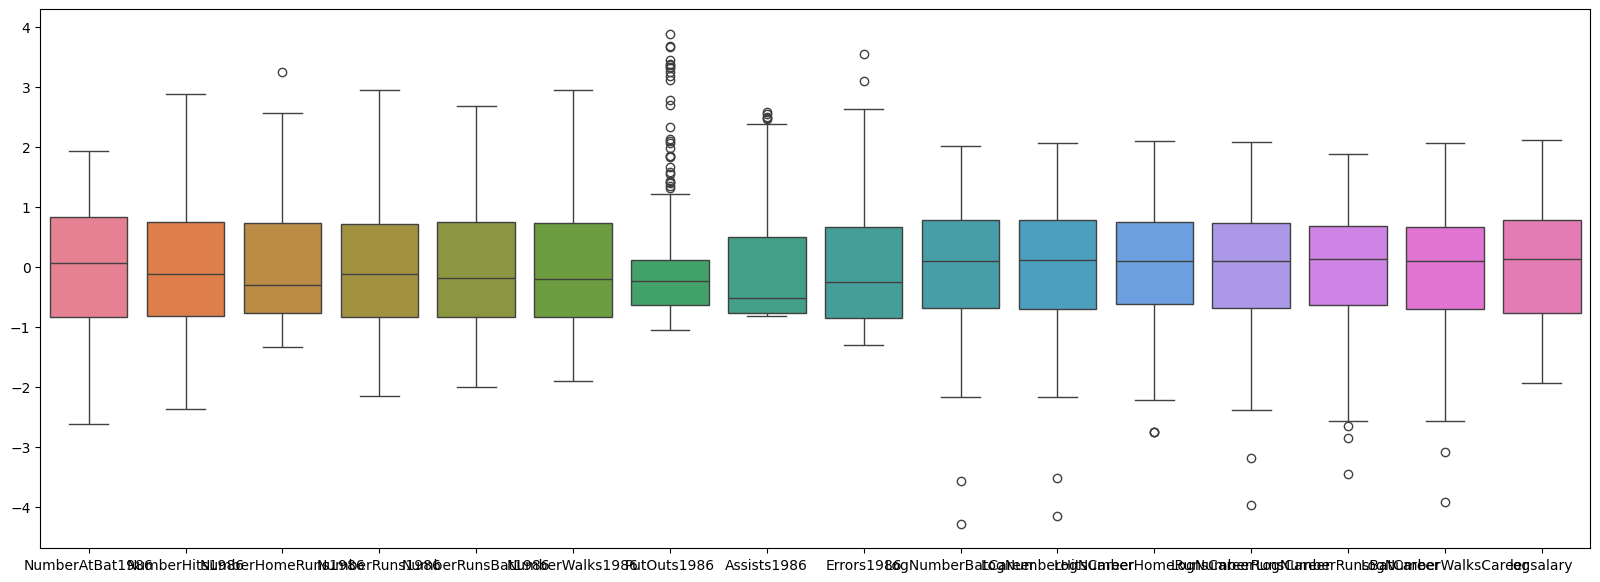

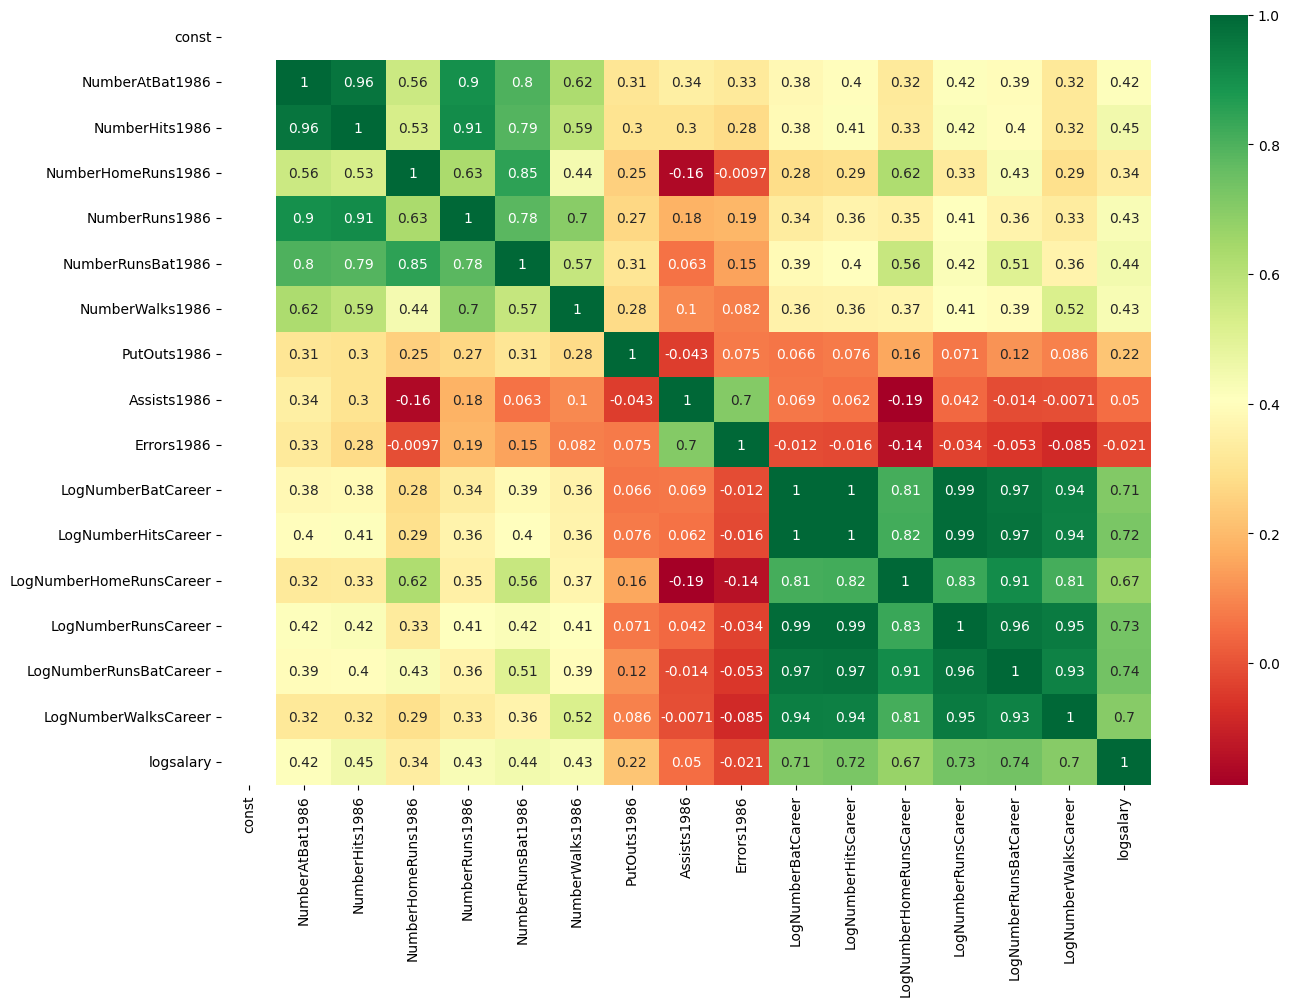

In [37]:
from sklearn.preprocessing import StandardScaler


# Use standard scale to bring all the values on similar scale
scaler = StandardScaler()
cols = performance_columns_1986+career_performance_columns+target_column


final_df = hitters[cols]
X = final_df
X[cols] = scaler.fit_transform(X)
X = sm.add_constant(X)

plt.figure(figsize=(20,7))
sns.boxplot(data = X[cols])
cols.remove("logsalary")

plt.figure(figsize=(15,10))
sns.heatmap(X.corr(),annot = True,cmap="RdYlGn")


model = sm.OLS(X["logsalary"], X[cols+["const"]])
results = model.fit()
print(results.summary())

We see that columns like LogNumberHomeRunsCareer and LogNumberHitsCareer are clearly less significant in explaining the variance in the logsalary. So we remove these columns and experiment by trial and error to arrive at the significant columns below.

In [38]:
# Remove insignificant columns by trial and error by seeing the pvalues and coefficient of determinationt to arrive at the following significant columns
signifanct_cols = ["LogNumberRunsBatCareer", "NumberAtBat1986", "NumberHits1986"]
target_column = ["logsalary"]



# Lets check the significance of these values
model = sm.OLS(X[target_column[0]], X[signifanct_cols])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              logsalary   R-squared (uncentered):                   0.581
Model:                            OLS   Adj. R-squared (uncentered):              0.576
Method:                 Least Squares   F-statistic:                              120.1
Date:                Sat, 07 Dec 2024   Prob (F-statistic):                    7.93e-49
Time:                        02:21:25   Log-Likelihood:                         -258.83
No. Observations:                 263   AIC:                                      523.7
Df Residuals:                     260   BIC:                                      534.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

We see that even tough the coefficient of determination is 0.57 which means the columns explain 57% of variance and the column P>|t| show that all the values are significant considering the significance level as 5%(0.05).

Lets build a model and train and test it by splitting the data.



<Figure size 600x400 with 0 Axes>

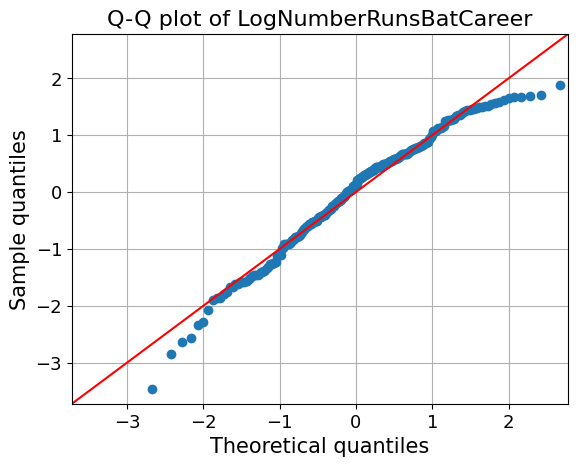

<Figure size 600x400 with 0 Axes>

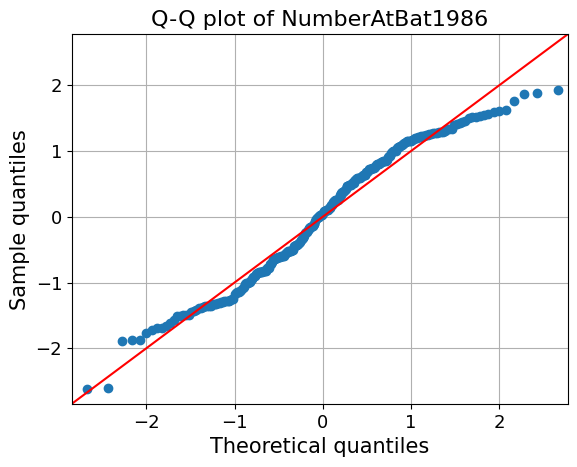

<Figure size 600x400 with 0 Axes>

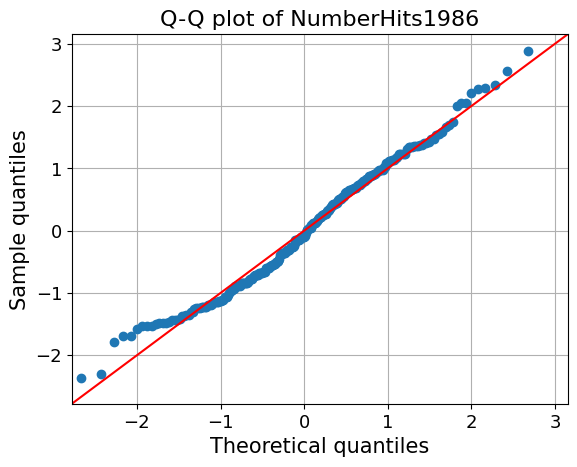

In [39]:
# Verify the distribution of predictor using Q-Q plot
from statsmodels.graphics.gofplots import qqplot
norm_dist_data=X[signifanct_cols]
for c in norm_dist_data.columns[:]:
  plt.figure(figsize=(6,4))
  fig=qqplot(X[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

The columns are approximately normally distributed, so we proceed further to train and test the data using LinearRegression model as we have numerical target column.

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


X_cols = X[signifanct_cols]
y_cols = X[target_column[0]]

X_train, X_test,y_train, y_test = train_test_split(X_cols,y_cols, random_state=10,train_size=0.8)

print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())

X_train : 
     LogNumberRunsBatCareer  NumberAtBat1986  NumberHits1986
81                 1.000468        -1.010989       -0.839906
194                0.774529         1.260704        0.914112
147                0.449132         1.328719        1.669006
2                  0.269409         0.512542        0.492260
242                0.387382        -1.276247       -1.150744

X_test : 
     LogNumberRunsBatCareer  NumberAtBat1986  NumberHits1986
206               -0.917521         0.022835       -0.329242
214                0.339608        -0.500878       -0.684486
154                0.514448         0.907027        0.869706
51                -1.584228        -1.289850       -1.217353
91                 0.494066         0.485336        0.336840

y_train : 
81     0.203942
194    0.835779
147    0.817707
2      0.276777
242   -0.458826
Name: logsalary, dtype: float64

y_test : 
206   -1.033558
214    0.653281
154   -0.341244
51    -1.886993
91     1.330348
Name: logsalary, dtype: float64

The intercept b0=  -0.008103254532368914
The coefficient b1=  [ 0.64881322 -0.38657464  0.55880515]
Training Score: 0.5622242252623165
MAE: 0.46874018043046006
MSE: 0.3981724617782847
RMSE: 0.631009082167828
R2: 0.6410854908656862


Text(0.5, 1.0, 'Histogram of residuals')

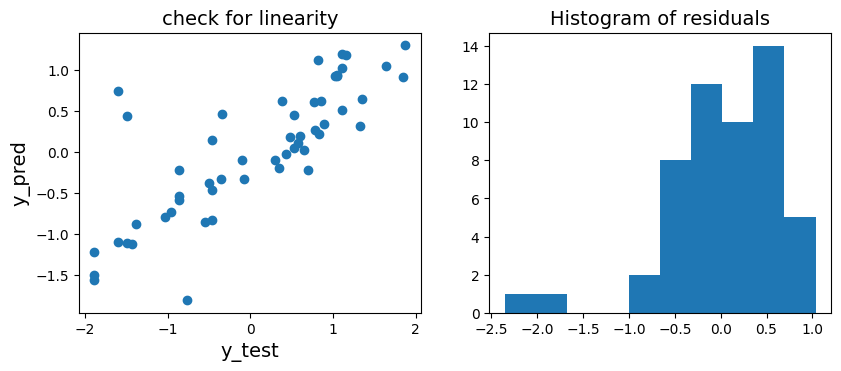

In [42]:
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()
linearModel.fit(X_train,y_train) # Training data

print("The intercept b0= ", linearModel.intercept_)
print("The coefficient b1= ", linearModel.coef_)
print(f"Training Score: {linearModel.score(X_train, y_train)}")

predictions = linearModel.predict(X_test)
from sklearn.metrics import mean_absolute_error, r2_score

# Compute metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = linearModel.score(X_test, y_test)

# Display metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.scatter(y_test, predictions)
plt.xlabel('y_test',fontsize=14), plt.ylabel('y_pred',fontsize=14)
plt.title('check for linearity',fontsize=14)
plt.subplot(2,3,2)
plt.hist(y_test - predictions)
plt.title('Histogram of residuals',fontsize=14)

The regression is complete for the hitters:
- We see that the performance metrics which influence the 1987 annual salary of the hitters are the number of runs batted through career, Number of times batted in 1986 season and Number of hits by the hitter in 1986.
- The model explains 64% of variance of salary.
- The predictions from our model is moderately significant as we see in the linearity graph. This is because we only consider the performance metrics here. The predictions from model could be off by 0.47 points from actual.

We now quickly perform the regression on the pitchers data:

/var/folders/_g/pnkjprqj7z3d7wwtd6jwl2fc0000gn/T/ipykernel_17517/2055046146.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.replace([np.inf, -np.inf], np.nan, inplace=True)


                                 OLS Regression Results                                
Dep. Variable:              logsalary   R-squared (uncentered):                   0.725
Model:                            OLS   Adj. R-squared (uncentered):              0.675
Method:                 Least Squares   F-statistic:                              14.69
Date:                Sat, 07 Dec 2024   Prob (F-statistic):                    1.97e-14
Time:                        02:42:29   Log-Likelihood:                         -61.160
No. Observations:                  79   AIC:                                      146.3
Df Residuals:                      67   BIC:                                      174.8
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

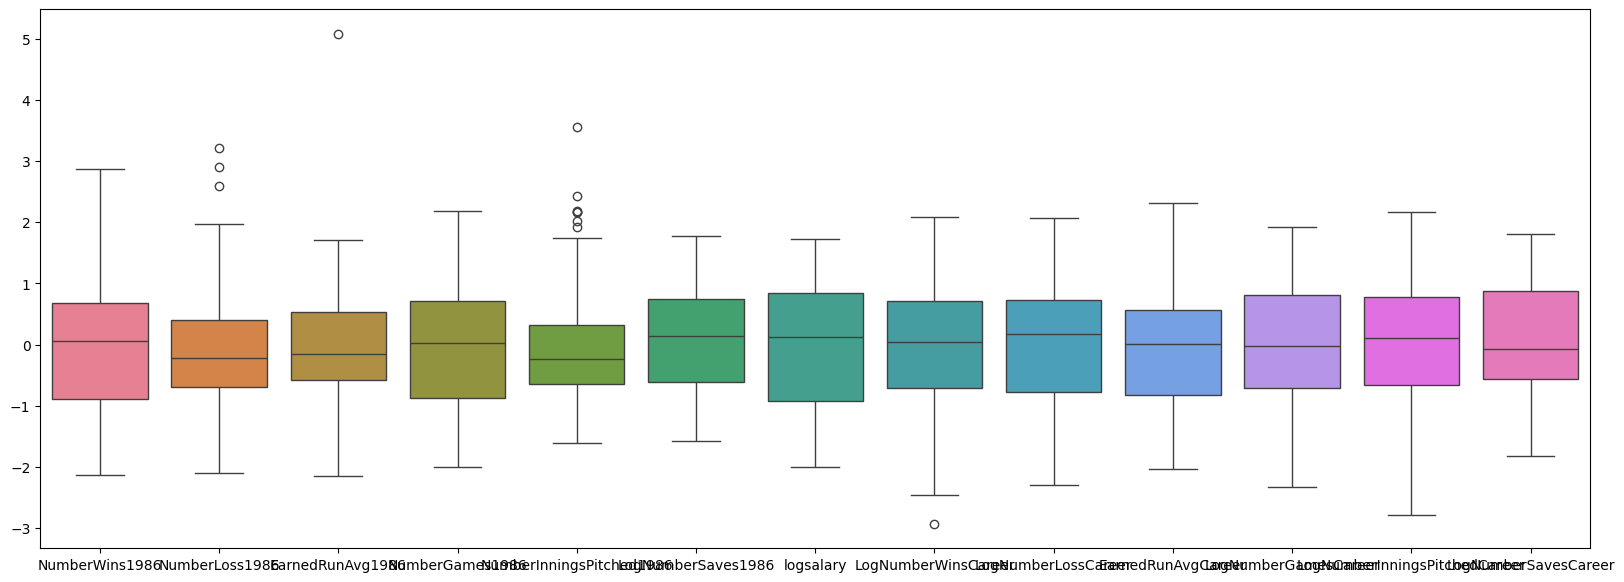

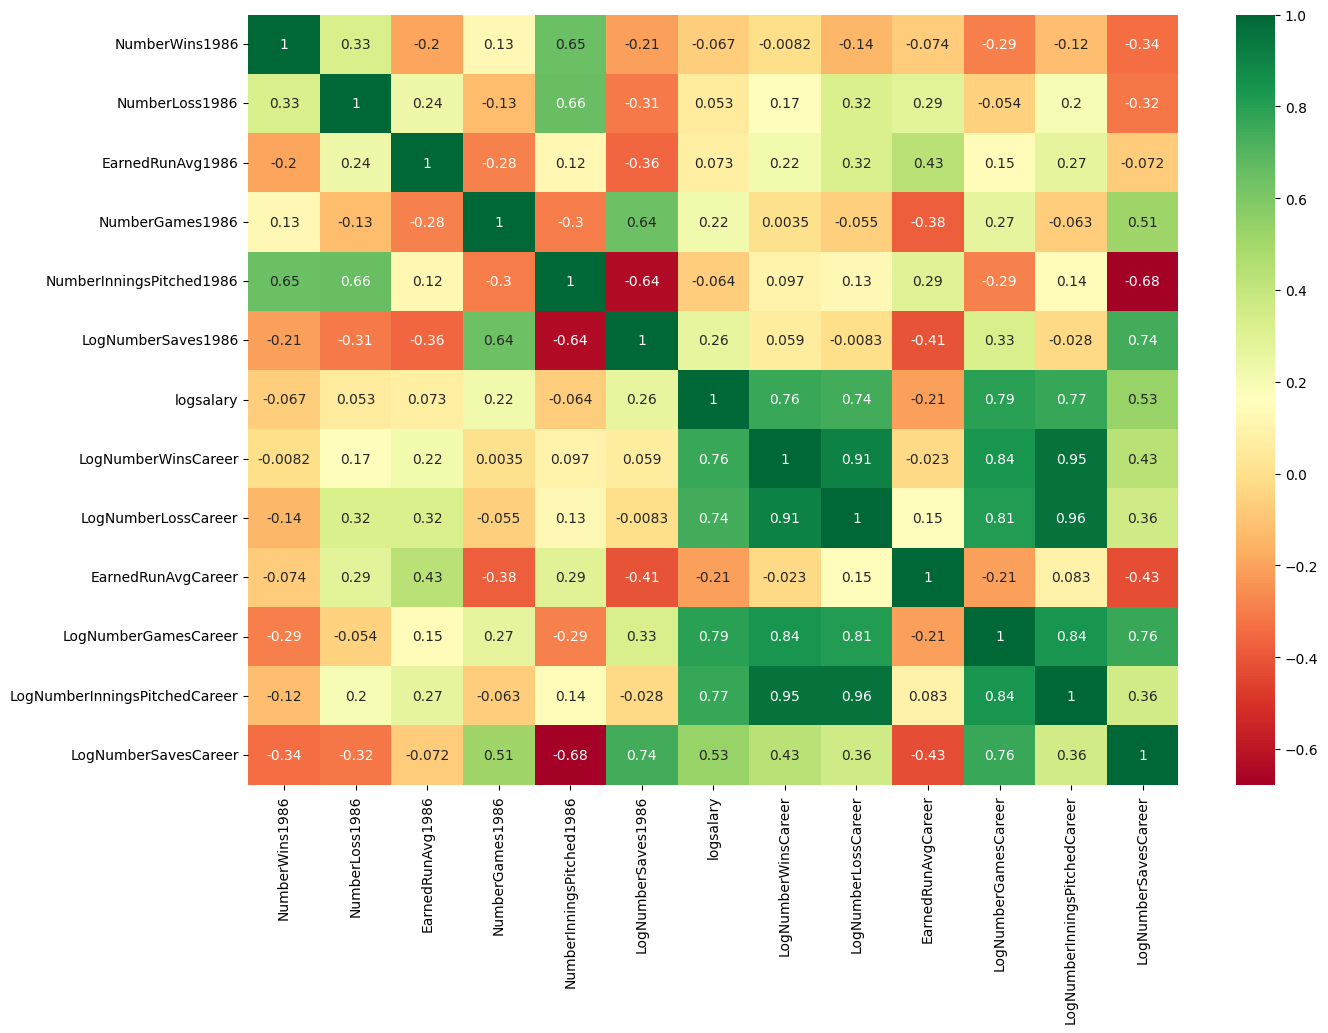

In [45]:
cols = pitchers_performance_1986+ target_column + pitchers_performance_career
final_df = pitchers[cols]

# We see that pitchers have infinity columns so we drop them
final_df.replace([np.inf, -np.inf], np.nan, inplace=True)
final_df = final_df.dropna()
final_df.isin([np.inf, -np.inf]).sum().sum()

X = final_df
X[cols] = scaler.fit_transform(X)

# Plot the scaled data
plt.figure(figsize=(20,7))
sns.boxplot(data = X)
cols.remove("logsalary")

# Plot the correlation heatmap of scaled data
plt.figure(figsize=(15,10))
sns.heatmap(X.corr(),annot = True,cmap="RdYlGn")


model = sm.OLS(X["logsalary"], X[cols])
results = model.fit()
print(results.summary())

In [46]:
# Remove insignificant columns by trial and error by seeing the pvalues and coefficient of determinationt to arrive at the following significant columns
signifanct_cols = ["LogNumberSaves1986", "LogNumberInningsPitchedCareer", "EarnedRunAvgCareer"]
target_column = ["logsalary"]

model = sm.OLS(X[target_column[0]], X[signifanct_cols])
results = model.fit()
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:              logsalary   R-squared (uncentered):                   0.702
Model:                            OLS   Adj. R-squared (uncentered):              0.690
Method:                 Least Squares   F-statistic:                              59.57
Date:                Sat, 07 Dec 2024   Prob (F-statistic):                    6.49e-20
Time:                        02:44:25   Log-Likelihood:                         -64.323
No. Observations:                  79   AIC:                                      134.6
Df Residuals:                      76   BIC:                                      141.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

<Figure size 600x400 with 0 Axes>

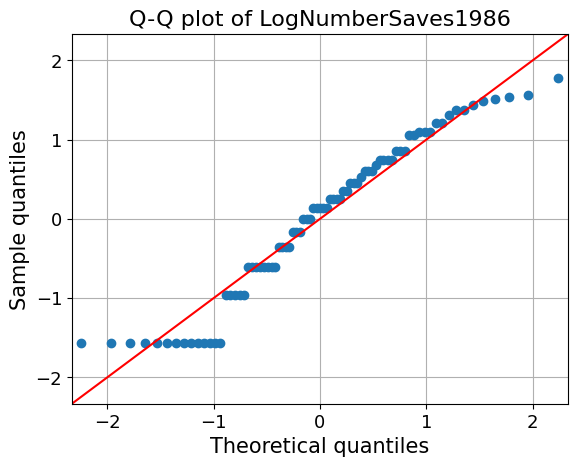

<Figure size 600x400 with 0 Axes>

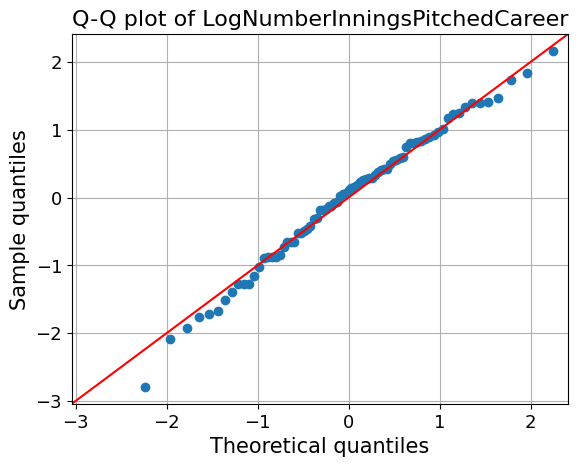

<Figure size 600x400 with 0 Axes>

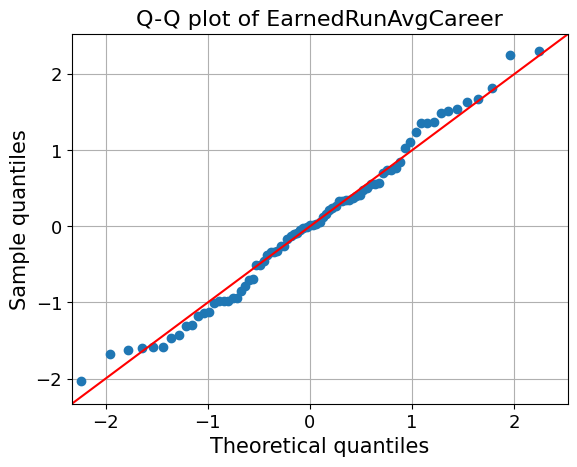

In [47]:
# Check for normal distribution of predictable variables
from statsmodels.graphics.gofplots import qqplot
norm_dist_data=X[signifanct_cols]
for c in norm_dist_data.columns[:]:
  plt.figure(figsize=(6,4))
  fig=qqplot(X[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

All the columns are approx. normally distributed


In [48]:
from sklearn.model_selection import train_test_split


X_cols = X[signifanct_cols]
y_cols = X[target_column[0]]

X_train, X_test,y_train, y_test = train_test_split(X_cols,y_cols ,random_state=42,train_size=0.8)

print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())

X_train : 
     LogNumberSaves1986  LogNumberInningsPitchedCareer  EarnedRunAvgCareer
193            0.251517                      -1.669572            0.124205
159            0.354636                      -1.715359            1.241044
149            1.782937                       0.806749           -0.785220
116           -0.962181                       0.108246           -0.099162
28            -1.569029                      -0.656963           -0.944769

X_test : 
    LogNumberSaves1986  LogNumberInningsPitchedCareer  EarnedRunAvgCareer
85           -0.159970                      -0.727029            0.762399
0             1.518291                       0.967835            0.379483
65           -0.355332                      -0.178692           -0.705446
87           -1.569029                       0.189531            0.060386
59            1.379030                      -0.457844           -1.471278

y_train : 
193   -1.194359
159   -0.918429
149    1.151535
116   -0.092621
28    -0

The intercept b0=  0.027143450638460978
The coefficient b1=  [ 0.23468876  0.77436016 -0.12505901]
Training Score: 0.6562065536289998
MAE: 0.4102357620551318
MSE: 0.2786467578781032
RMSE: 0.5278700198705201
R2: 0.7755439417652558


Text(0.5, 1.0, 'Histogram of residuals')

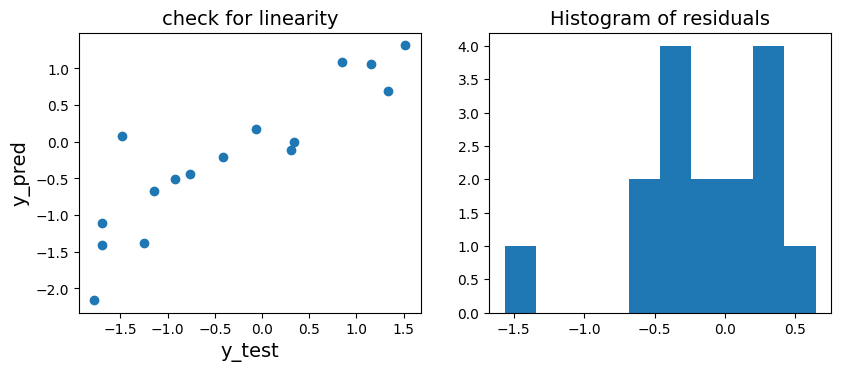

In [49]:
linearModel = LinearRegression()
linearModel.fit(X_train,y_train)


print("The intercept b0= ", linearModel.intercept_)
print("The coefficient b1= ", linearModel.coef_)
print(f"Training Score: {linearModel.score(X_train, y_train)}")
predictions = linearModel.predict(X_test)

from sklearn.metrics import mean_absolute_error, r2_score

# Compute metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Display metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.scatter(y_test, predictions)
plt.xlabel('y_test',fontsize=14), plt.ylabel('y_pred',fontsize=14)
plt.title('check for linearity',fontsize=14)
plt.subplot(2,3,2)
plt.hist(y_test - predictions)
plt.title('Histogram of residuals',fontsize=14)


The regression is complete for the pitchers, we make the following observations:
- We see that the performance metrics which influence the 1987 annual salary of the pitchers are the number of saves by pitcher in 1986, Number of innings pitched through career and Avg. Number of runs earned by opposite team from the pitcher through career.
- Note that the earning potential of pitcher decreases by 0.12505 points with increase in each score earned by opposite team from the pitcher as it has negative coefficient. 
- The model explains 77% of variance of salary.
- The predictions from our model is highly significant as we see in the linearity graph which are close.  The predictions from model could be off by 0.41 points from actual.
- This model is better than the hitters model in explaining the variance of salaries of the pitchers.


We see that the number of hits from the hitters in 1986 is significant metric and for pitchers the number of saves in 1986 is a significant metric tied to the season 1986. So we use these values to identify the top 10% of the hitters and pitchers and identify patterns and quantify non performance based columns like the team and number of years at major league.

In [52]:
pitchers_interesting_columns = ["NumberSaves1986"]
hitters_interesting_columns = ["NumberHits1986"]

top_n_pitchers = int(len(pitchers) * 0.1)
top_pitchers = pitchers.nlargest(top_n_pitchers, pitchers_interesting_columns)
topp_pitchers_names = top_pitchers["PitcherName"].to_list()
pitchers["TopPitchers"] = pitchers["PitcherName"].transform(lambda x: (x in topp_pitchers_names))

top_n_hitters = int(len(pitchers) * 0.1)
top_hitters = hitters.nlargest(top_n_hitters, hitters_interesting_columns)
topp_hitters_names = top_hitters["Hitter"].to_list()
hitters["TopHitters"] = hitters["Hitter"].transform(lambda x: (x in topp_hitters_names))

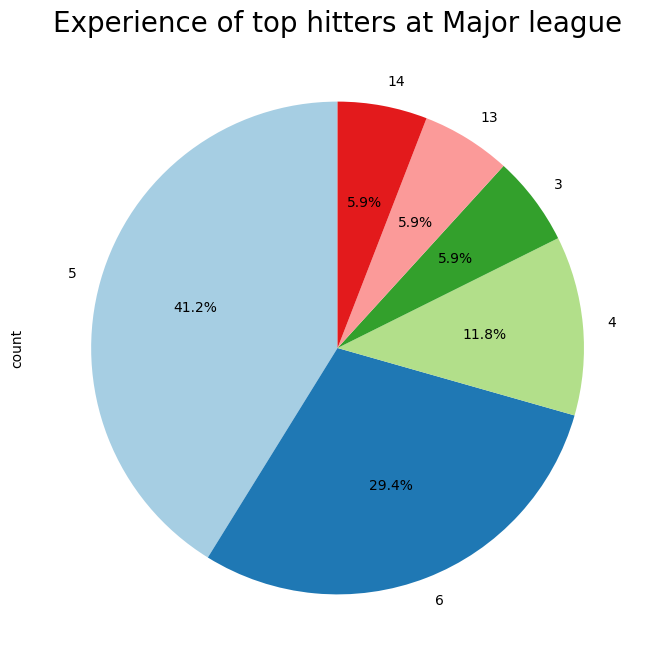

In [53]:
#visualising for experience in major league by top hitters

counts = top_hitters['YearsMajorleag'].value_counts()

plt.figure(figsize=(8, 8))
counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Experience of top hitters at Major league", size = 20)
plt.show()

We see that the more that 70% of the top hitters have spent 5-6 years at major league.


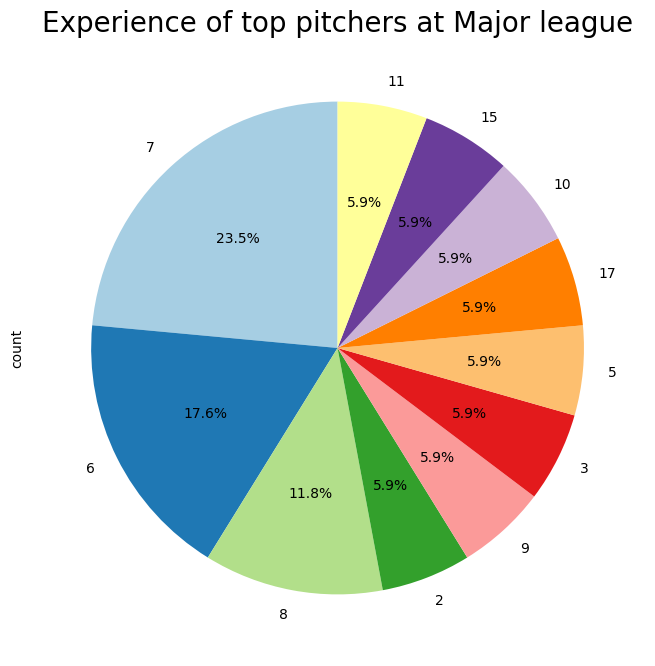

In [54]:
counts = top_pitchers['NumberYearsMajorLeague'].value_counts()

plt.figure(figsize=(8, 8))
counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Experience of top pitchers at Major league", size = 20)
plt.show()

We see that more than 50% of the top pitchers are have spent 6-8 years at a major league.
Since both the data show that there is some connection of top players and number of years with proof that for 1986 more than 50% of the top players had 5-8 years of experience at major baseball league.

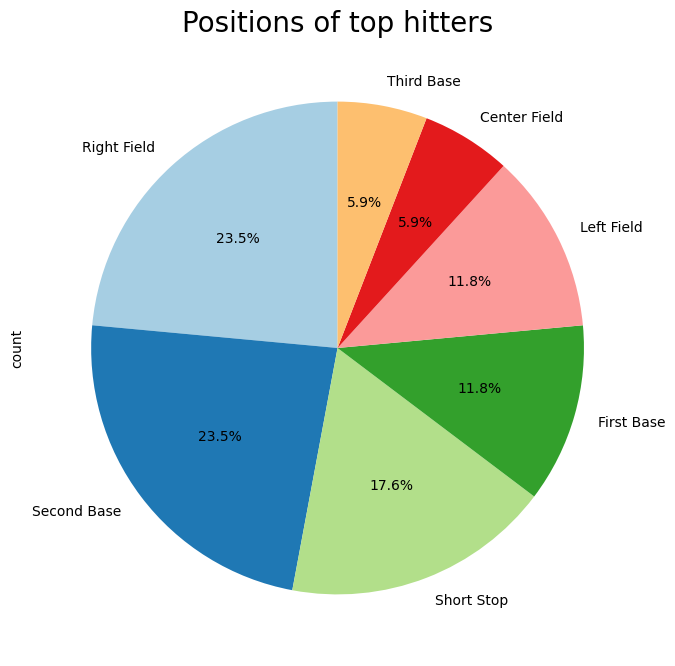

In [55]:
counts = top_hitters["Position1986Vals"].value_counts()

plt.figure(figsize=(8, 8))
counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Positions of top hitters", size = 20)
plt.show()

Positions of the top hitters are at Second base right field and shot stop with more than 50% representation

<Axes: ylabel='Top Hitters'>

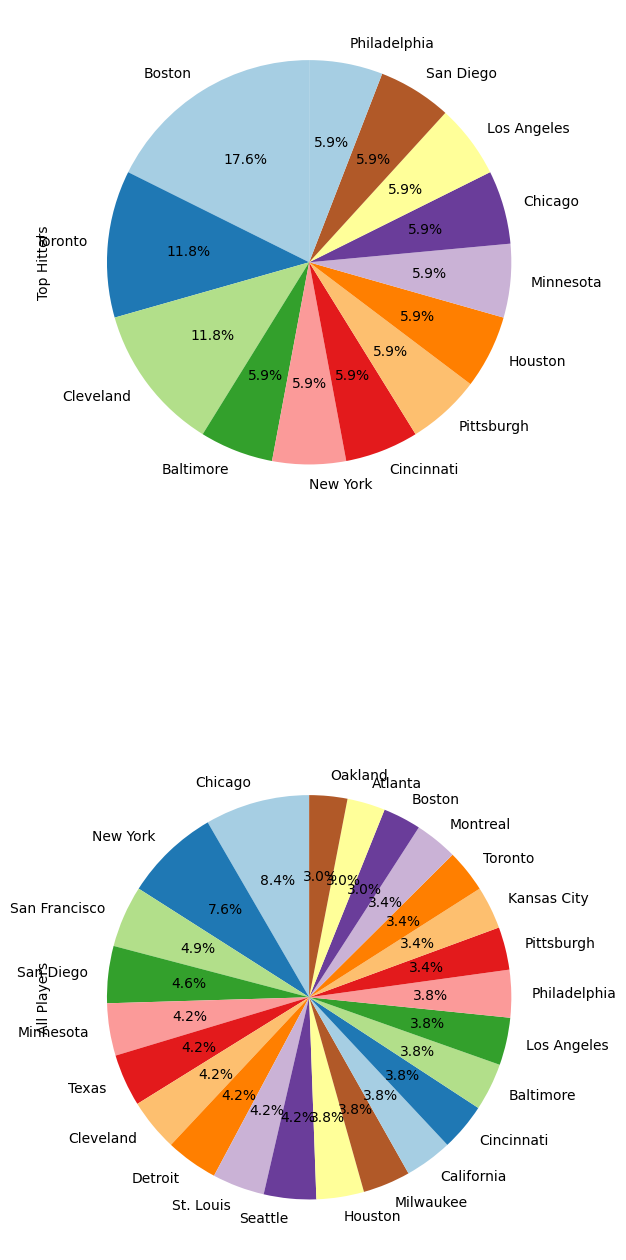

In [57]:
top_counts = hitters[hitters['TopHitters'] == True]['TeamEnd1986Vals'].value_counts()
total_counts = hitters["TeamEnd1986Vals"].value_counts()
# print(counts)
# print(total_counts)

plt.figure(figsize=(30, 35))
plt.subplot(1,4,1)
total_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, label="All Players")
plt.subplot(2,4,1)
top_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, label="Top Hitters")

We see that team has no influence with performance, from the second pie chart we see that the Chicagom New York and San Fransico are resourceful with more players. But the top players are repersented from completely different teams (Boston, Cleveland, Toronto). So this shows that we cannot increase chance of winning just by having more players in team.

<Axes: ylabel='Top Pitchers'>

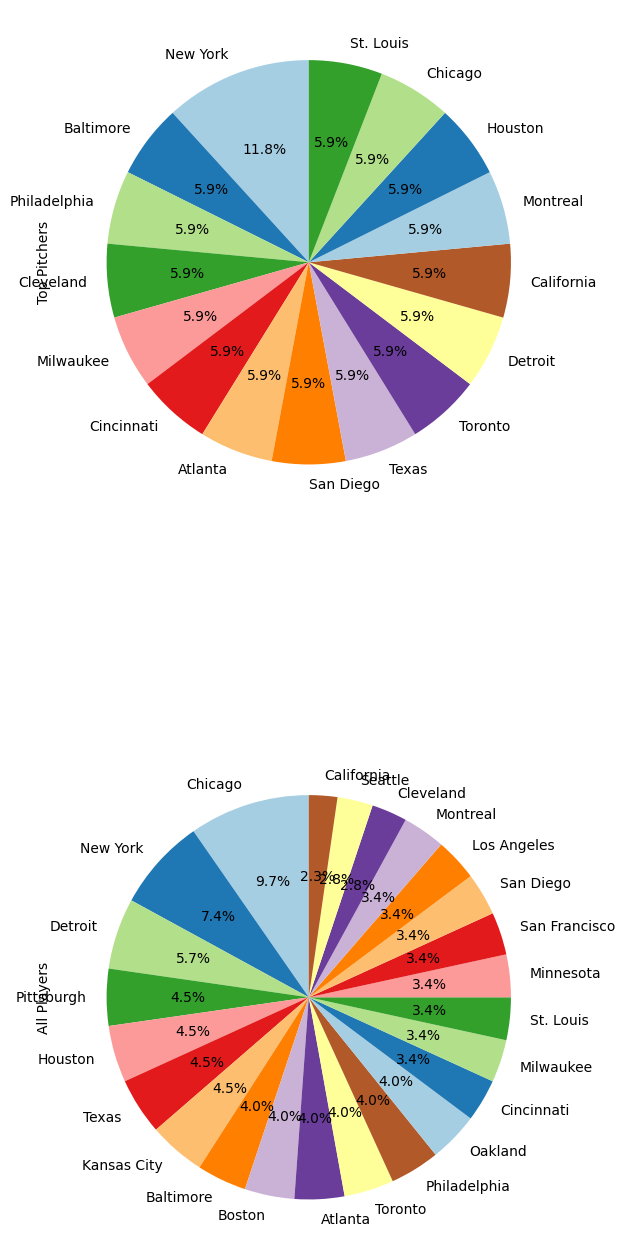

In [59]:
top_counts = pitchers[pitchers['TopPitchers'] == True]['TeamEnd1986Vals'].value_counts()
total_counts = pitchers["TeamEnd1986Vals"].value_counts()

plt.figure(figsize=(30, 35))
plt.subplot(1,4,1)
total_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, label="All Players")
plt.subplot(2,4,1)
top_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, label="Top Pitchers")

We see the same for the pitchers, there is no direct relation, we see that the top pitchers equally represented by all teams with except for New York.

## CONCLUSION
We analysed the baseball data of pitchers and hitters to identify how much of performance metrics influenced the salary of players, and which performance metrics were significant in explaining the salary of players in 1987.<br/>
Also, we found few interesting non performance metrics of the top performers by visualizing and identifying patterns of representation by the top players.